<a href="https://colab.research.google.com/github/ShivamBaharwani/Market-Analysis/blob/main/SuperMarketAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install gdown

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [54]:
path = '/content/drive/MyDrive/supermarket.csv'

In [55]:
df = pd.read_csv(path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [9]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [10]:
# function to find time

def extract_timeofday(x):
    if x==00:
        return 'Midnight'
    elif x==12:
        return 'Noon'
    elif x>00 and x < 12:
        return 'Morning'
    elif x>12 and x<18:
        return 'Afternoon'
    else:
        return 'Evening'

## Adding day time for better visualization

In [11]:
import warnings
warnings.filterwarnings('ignore')
df['Day time'] = pd.to_datetime(df['Time']).dt.hour.apply(extract_timeofday)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [13]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day time
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,Afternoon
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,Morning
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,Afternoon
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,Evening
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,Morning


### Removing
- Time beacuse we had divided time into categories
- Invoice id, not important for insights generation

In [14]:
# remove invoice id and time
df.drop(['Invoice ID', 'Time'], axis =1, inplace =True)

### Converting date into formate (yyyy-mm-dd)
- Useful for better accessibility

In [15]:
df['Date'] = pd.to_datetime(df['Date'])

In [16]:
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cogs,gross margin percentage,gross income,Rating,Day time
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,Ewallet,522.83,4.761905,26.1415,9.1,Afternoon
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,Cash,76.40,4.761905,3.8200,9.6,Morning
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,Credit card,324.31,4.761905,16.2155,7.4,Afternoon
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,Ewallet,465.76,4.761905,23.2880,8.4,Evening
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,Ewallet,604.17,4.761905,30.2085,5.3,Morning


In [17]:
for i in df.columns[df.dtypes == 'object']:
    print(df[i].value_counts(dropna = False))
    print()

Branch
A    340
B    332
C    328
Name: count, dtype: int64

City
Yangon       340
Mandalay     332
Naypyitaw    328
Name: count, dtype: int64

Customer type
Member    501
Normal    499
Name: count, dtype: int64

Gender
Female    501
Male      499
Name: count, dtype: int64

Product line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64

Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64

Day time
Afternoon    439
Evening      281
Morning      191
Noon          89
Name: count, dtype: int64



Checking duplicate values

In [18]:
df.duplicated().any()

False

Checking null values

In [19]:
df.isna().sum()

Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
Day time                   0
dtype: int64

## Creating lists of numerical and categorical columns
- Used to extract insights
- Comparing the tend
- Finding Similarities
- Many more

In [20]:
categorical = df.select_dtypes(include = 'object').columns
numerical = df.select_dtypes(include = 'number').columns

In [21]:
print(categorical)
print(numerical)

Index(['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment',
       'Day time'],
      dtype='object')
Index(['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs',
       'gross margin percentage', 'gross income', 'Rating'],
      dtype='object')


### Creating color palette for better visualization viewing experience

In [22]:
plt.style.use('fivethirtyeight')
palette = sns.color_palette('deep', 8)

In [23]:
palette

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373)]

## Order distribution per branch

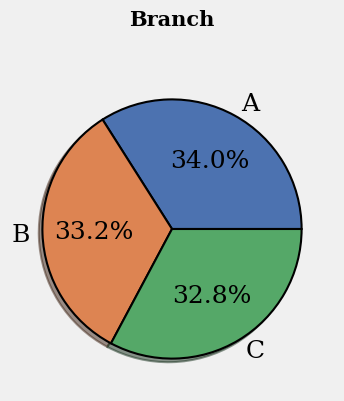

In [24]:
# First categorical variable
col = categorical[0]
pie_data = df[col].value_counts()

fig, ax = plt.subplots(figsize=(4, 4))
autotexts = ax.pie(pie_data, labels=pie_data.index, autopct='%1.1f%%',
                         textprops={'fontsize': 18, 'fontfamily': 'serif'},
                         shadow=True, wedgeprops={'edgecolor': 'black', 'lw': 1.5},
                         colors=palette)
# plt.set_title(col)
ax.set_title(col, fontsize=15, fontweight='bold',fontfamily='serif',pad=30)
plt.show()


### **It seems like all three branch have almost same number of orders**

# Customer type

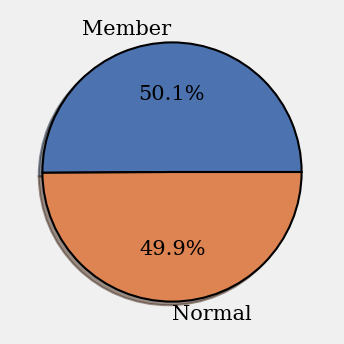

In [25]:
col2 = categorical[2]
pie_data = df[col2].value_counts()
fig , ax = plt.subplots(figsize=(4,4))
autotexts = plt.pie(pie_data, labels=pie_data.index, autopct = '%1.1f%%',
                      textprops= {'fontsize':15, 'fontfamily':'serif'},
                      shadow = True, wedgeprops = {'edgecolor': 'black', 'lw':1.5},
                      colors=palette)

### As shown in the graph, customers with membership is only .2 % more then the normal customers

# Using pie chart to represent all the categorical columns insights

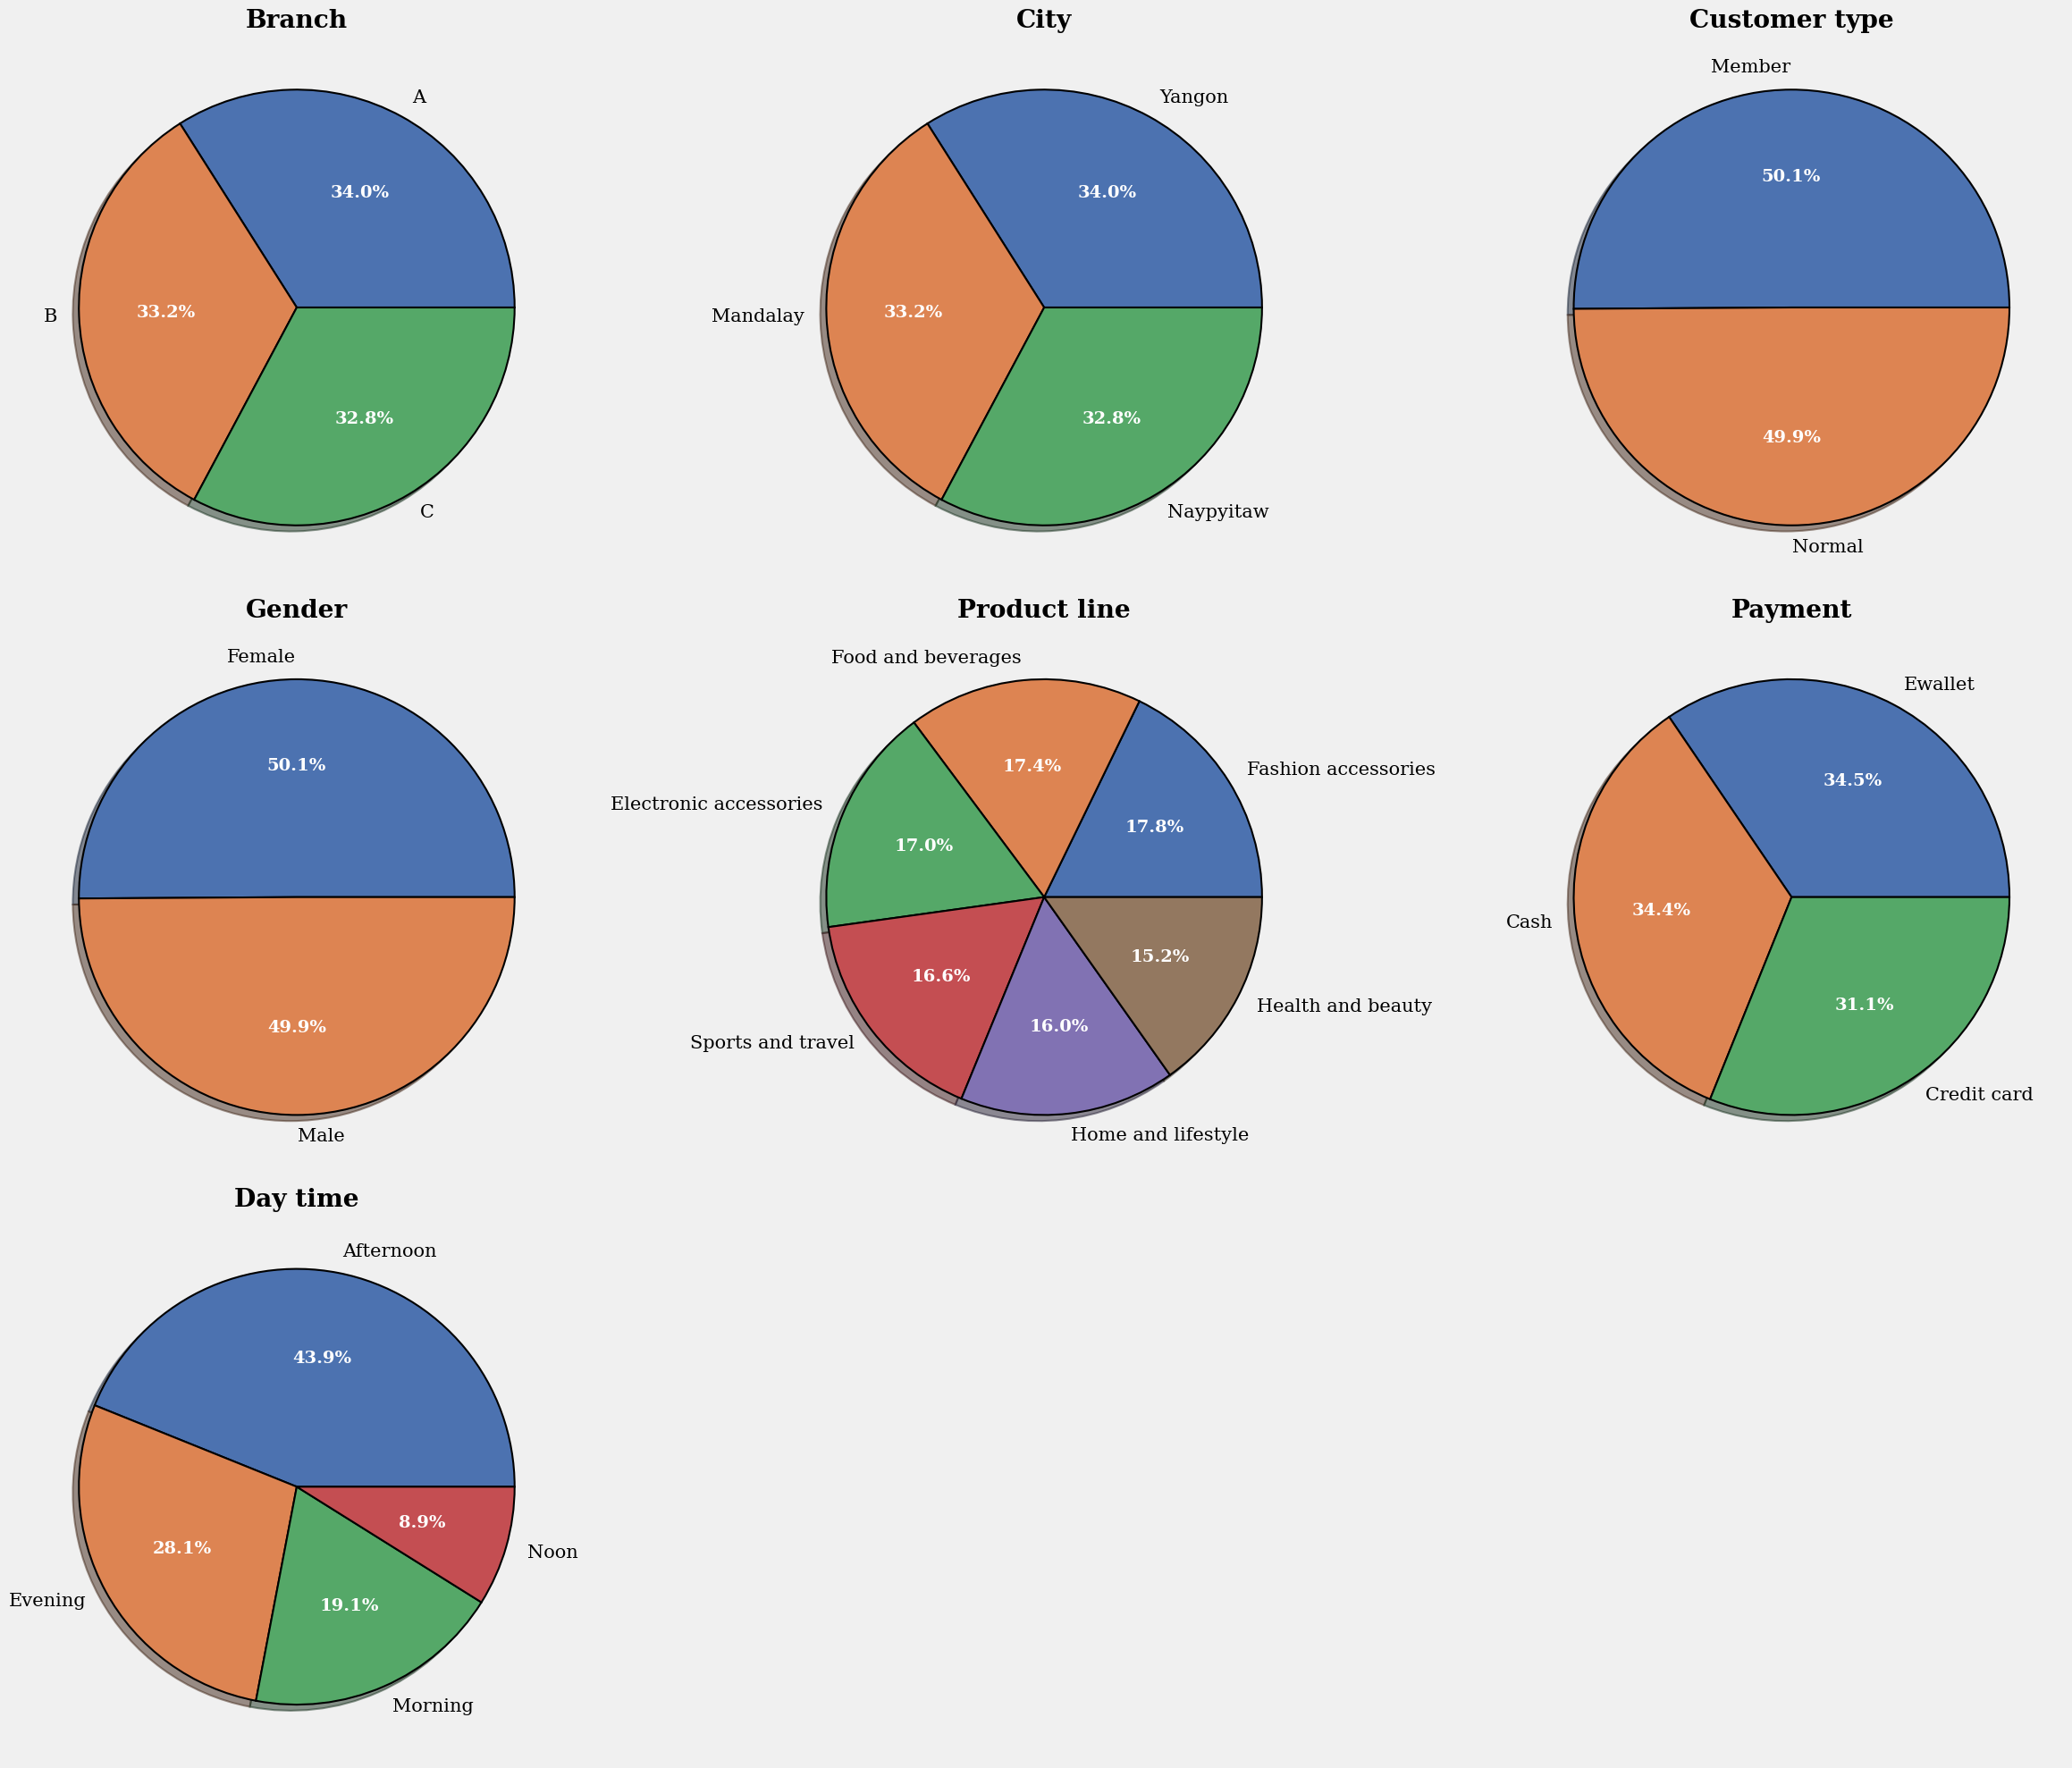

In [26]:
# displaing all categories pie chart using loop

fig, ax = plt.subplots(3, 3, figsize = (25, 20))
ax = ax.flatten()

for i, col in enumerate(categorical):
    pie_data = df[col].value_counts()
    # col = categorical[i]
    # fig, ax = plt.subplots(figsize=(2,2))
    _, _, autotexts = ax[i].pie(pie_data, labels=pie_data.index, autopct ='%1.1f%%',
                          textprops = {'fontsize':15, 'fontfamily':'serif'},
                          shadow= True, wedgeprops = {'edgecolor': 'black','lw':1.5},
                          colors = palette)
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_weight('bold')
        autotext.set_size(14)

    ax[i].set_title(col, fontweight = 'bold', fontfamily='serif')

for i in range(len(categorical), len(ax)):
    fig.delaxes(ax[i])

plt.tight_layout()
plt.show()

### In above representation except day time all other countries have almost the same percentages
- **Day time**
1. Afternoon : Highest sales with almost 44%
2. Evening : Second-Highest sales with around 28%
3. Morning : 19.1% Sales
4. Noon : During period around 12:00 PM the sales was 8.9%

### Performaing same visualization using countplot

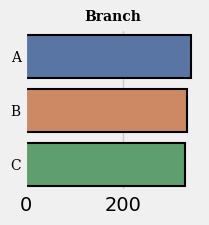

In [27]:
# ploting single count plot
fig , ax = plt.subplots(figsize=(2,2))
ax = sns.countplot(y=df['Branch'],data=df, palette = palette, edgecolor = 'black', lw=1.5, order = df['Branch'].value_counts().index,ax=ax)
# customize the plot
ax.set_title(categorical[0],fontweight = 'bold', fontfamily ='serif',fontsize=10)
ax.set_xlabel('')
ax.set(ylabel = None)
ax.set_yticklabels(ax.get_yticklabels(), fontfamily = 'serif', fontsize = 10)  # y axis label
plt.show()


[Text(0.5, 0, ''), Text(0, 0.5, '')]

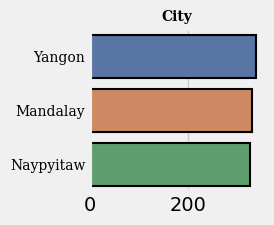

In [28]:
fig , ax=plt.subplots(figsize = (2,2))
ax = sns.countplot(y=df.City,data =df, palette = palette, edgecolor='black', lw=1.5, order= df.City.value_counts().index, ax=ax)
# customize the plot
ax.set_title(categorical[1],fontweight='bold', fontfamily='serif', fontsize=10)
ax.set_yticklabels(ax.get_yticklabels(), fontfamily = 'serif', fontsize = 10) # y axis label
ax.set(xlabel=None,ylabel=None)

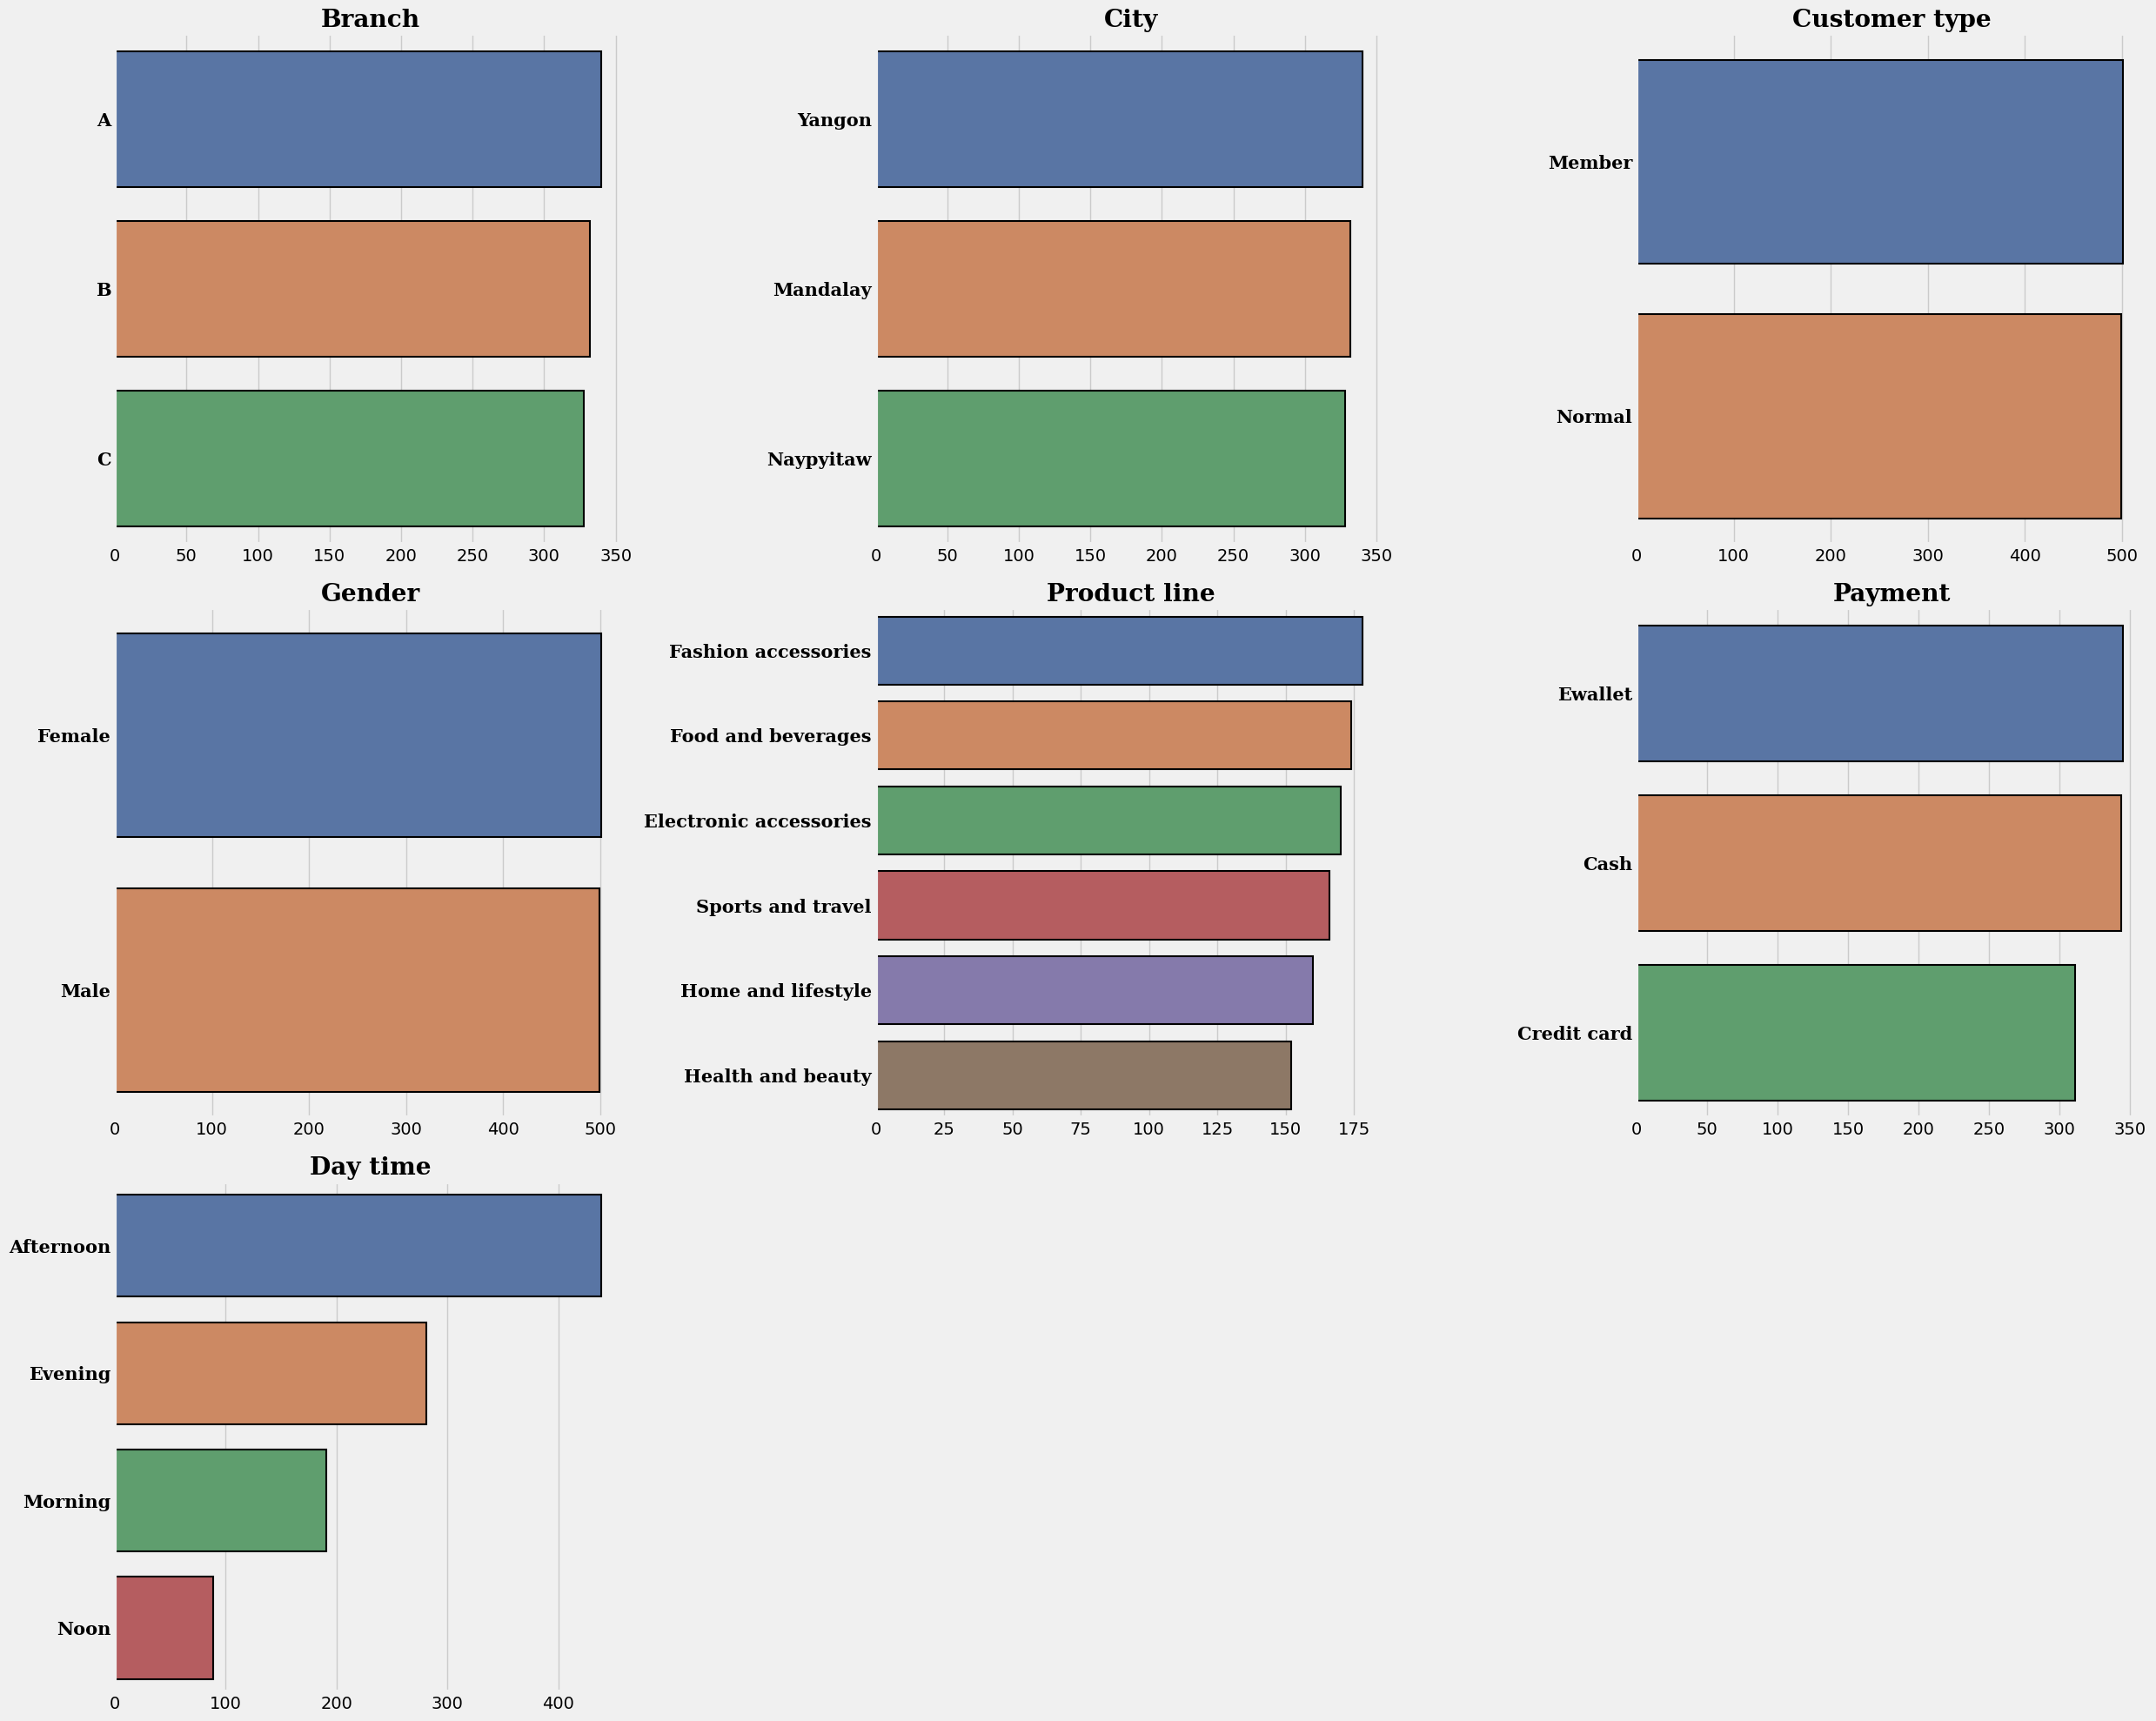

In [29]:
fig, ax=plt.subplots(3,3,figsize = (25,20))
ax = ax.flatten()
for i, col in enumerate(categorical):
    sns.countplot(y=col, data=df,ax=ax[i],palette=palette, edgecolor='black',lw=1.5,order=df[col].value_counts().index)
    ax[i].set_yticklabels(ax[i].get_yticklabels(), fontfamily = 'serif', fontsize = 15)
    ax[i].set_title(col, fontweight='bold',fontfamily='serif')
    ax[i].set(xlabel =None, ylabel =None)
    ax[i].set_yticklabels(ax[i].get_yticklabels(),fontfamily='serif',fontsize=15,fontweight='bold')

# removes empty ax
for i in range(len(categorical),len(ax)):
    fig.delaxes(ax[i])
plt.tight_layout()  # solve overlapping
plt.show()

In [30]:
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cogs,gross margin percentage,gross income,Rating,Day time
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,Ewallet,522.83,4.761905,26.1415,9.1,Afternoon
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,Cash,76.40,4.761905,3.8200,9.6,Morning
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,Credit card,324.31,4.761905,16.2155,7.4,Afternoon
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,Ewallet,465.76,4.761905,23.2880,8.4,Evening
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,Ewallet,604.17,4.761905,30.2085,5.3,Morning


### Merging branch and city columns for better understanding

In [31]:
# marging the branch and city
df.Branch = df.Branch.map({'A':'A || Yangon', 'B' : 'B || Mandalay', 'C' : 'C || Naypyitaw'})
df.drop('City', axis =1, inplace =True)
df.head()


,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cogs,gross margin percentage,gross income,Rating,Day time
0,A || Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,Ewallet,522.83,4.761905,26.1415,9.1,Afternoon
1,C || Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,Cash,76.40,4.761905,3.8200,9.6,Morning
2,A || Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,Credit card,324.31,4.761905,16.2155,7.4,Afternoon
3,A || Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,Ewallet,465.76,4.761905,23.2880,8.4,Evening
4,A || Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,Ewallet,604.17,4.761905,30.2085,5.3,Morning


# Extracting insights from numerical data

In [32]:
df['Unit price']

0      74.69
1      15.28
2      46.33
3      58.22
4      86.31
       ...  
995    40.35
996    97.38
997    31.84
998    65.82
999    88.34
Name: Unit price, Length: 1000, dtype: float64

In [33]:
numerical[0]

'Unit price'

Text(655.0378787878789, 0.5, 'Count')

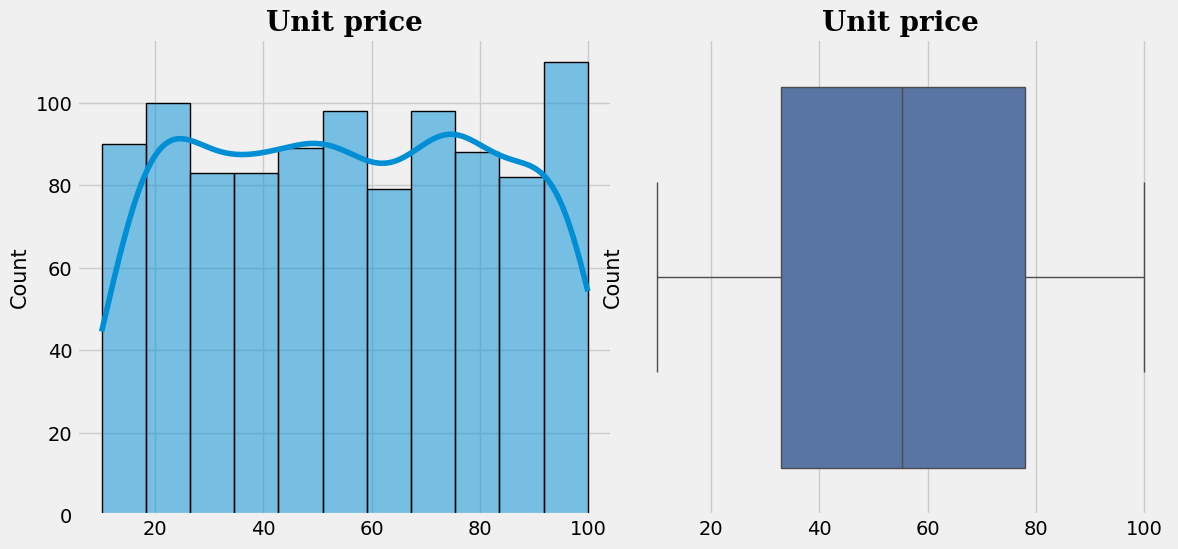

In [34]:
fig , axes = plt.subplots(1,2,figsize=(12,6))
ax = sns.histplot(ax=axes[0],x=numerical[0], data=df,palette=palette,kde=True, lw=True,edgecolor='black')
ax.set_title(numerical[0],fontweight='bold',fontfamily='serif', fontsize=20)
ax.set_xlabel('')
ax.set_ylabel('Count',fontsize=15)
px=sns.boxplot(ax=axes[1],x=df[numerical[0]],data=df,palette=palette)
plt.tight_layout()

px.set_title(numerical[0], fontweight = 'bold', fontfamily='serif', fontsize=20)
px.set_xlabel('')
px.set_ylabel('Count',fontsize=15)
# plt.show()

## It seem like product with unit price 100 has the highest sales

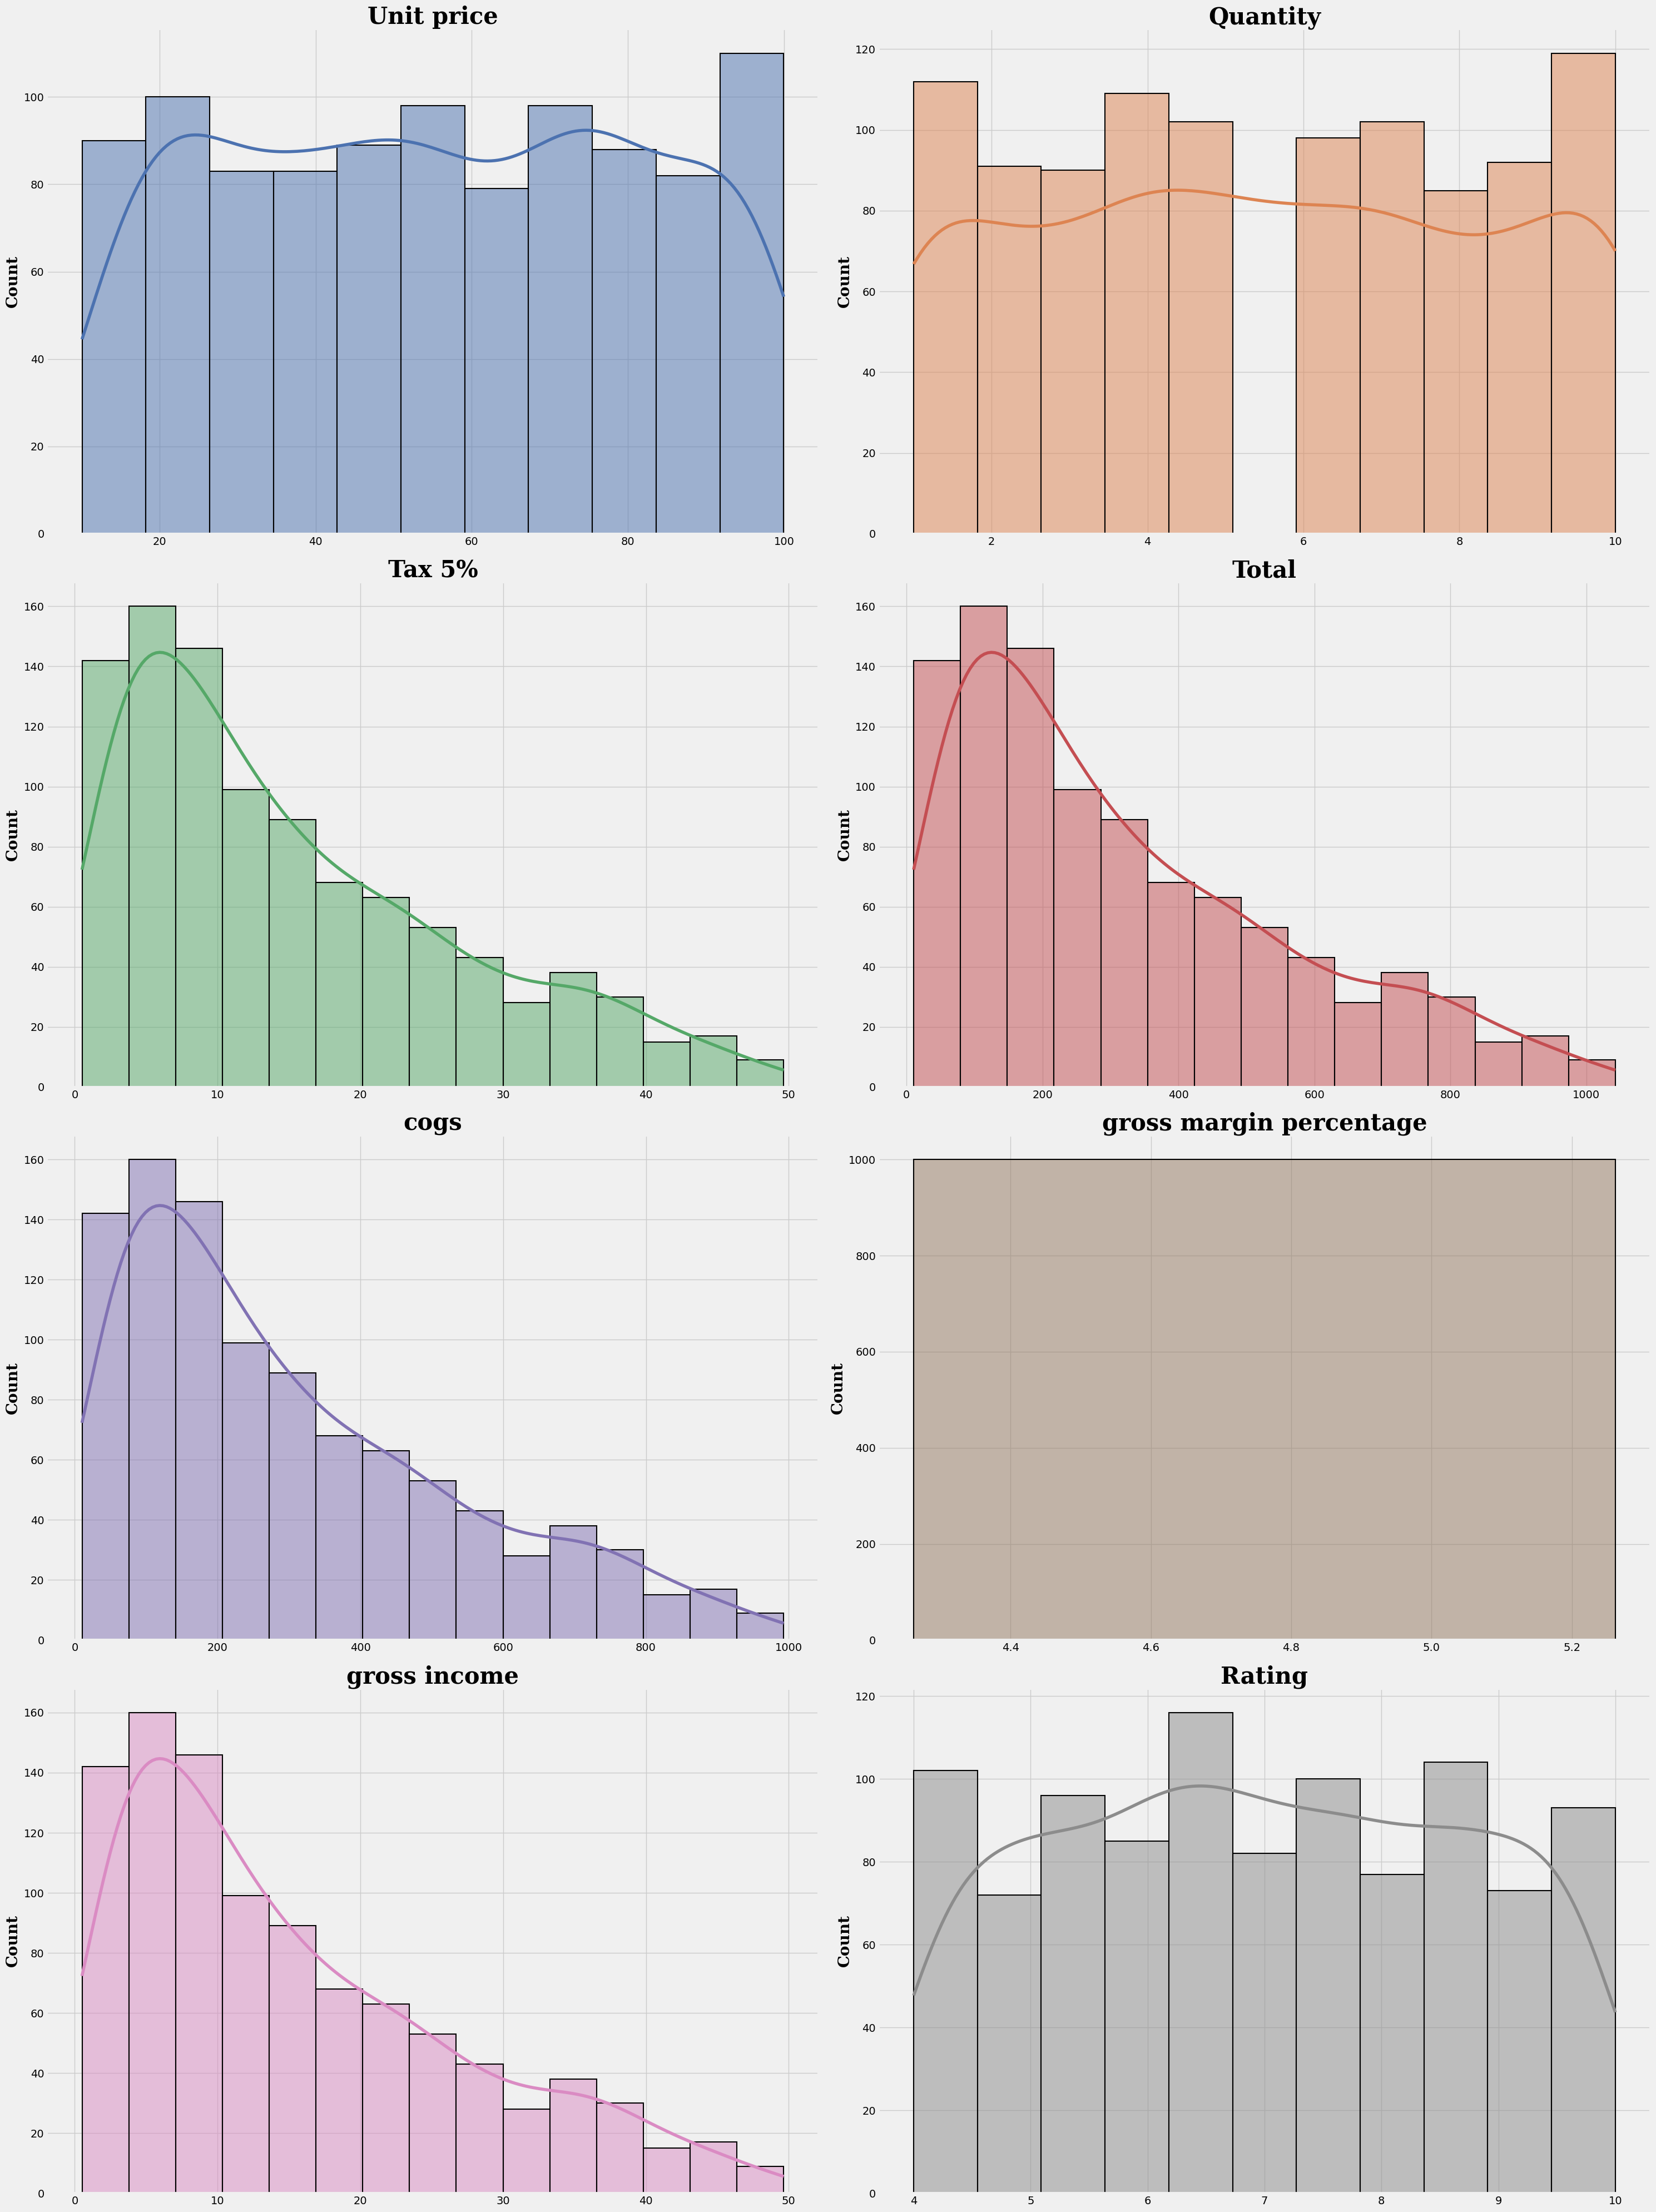

In [35]:
fig, axes = plt.subplots(4,2, figsize =(30,40))
ax=axes.flatten()
for i, col in enumerate(numerical):
    sns.histplot(x=col, data=df, ax=ax[i], color=palette[i], kde=True, lw=1.5,edgecolor='black')
    ax[i].set_title(col, fontweight = 'bold', fontfamily='serif',fontsize=30)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Count', fontweight = 'bold', fontfamily='serif', fontsize=20)
plt.tight_layout()

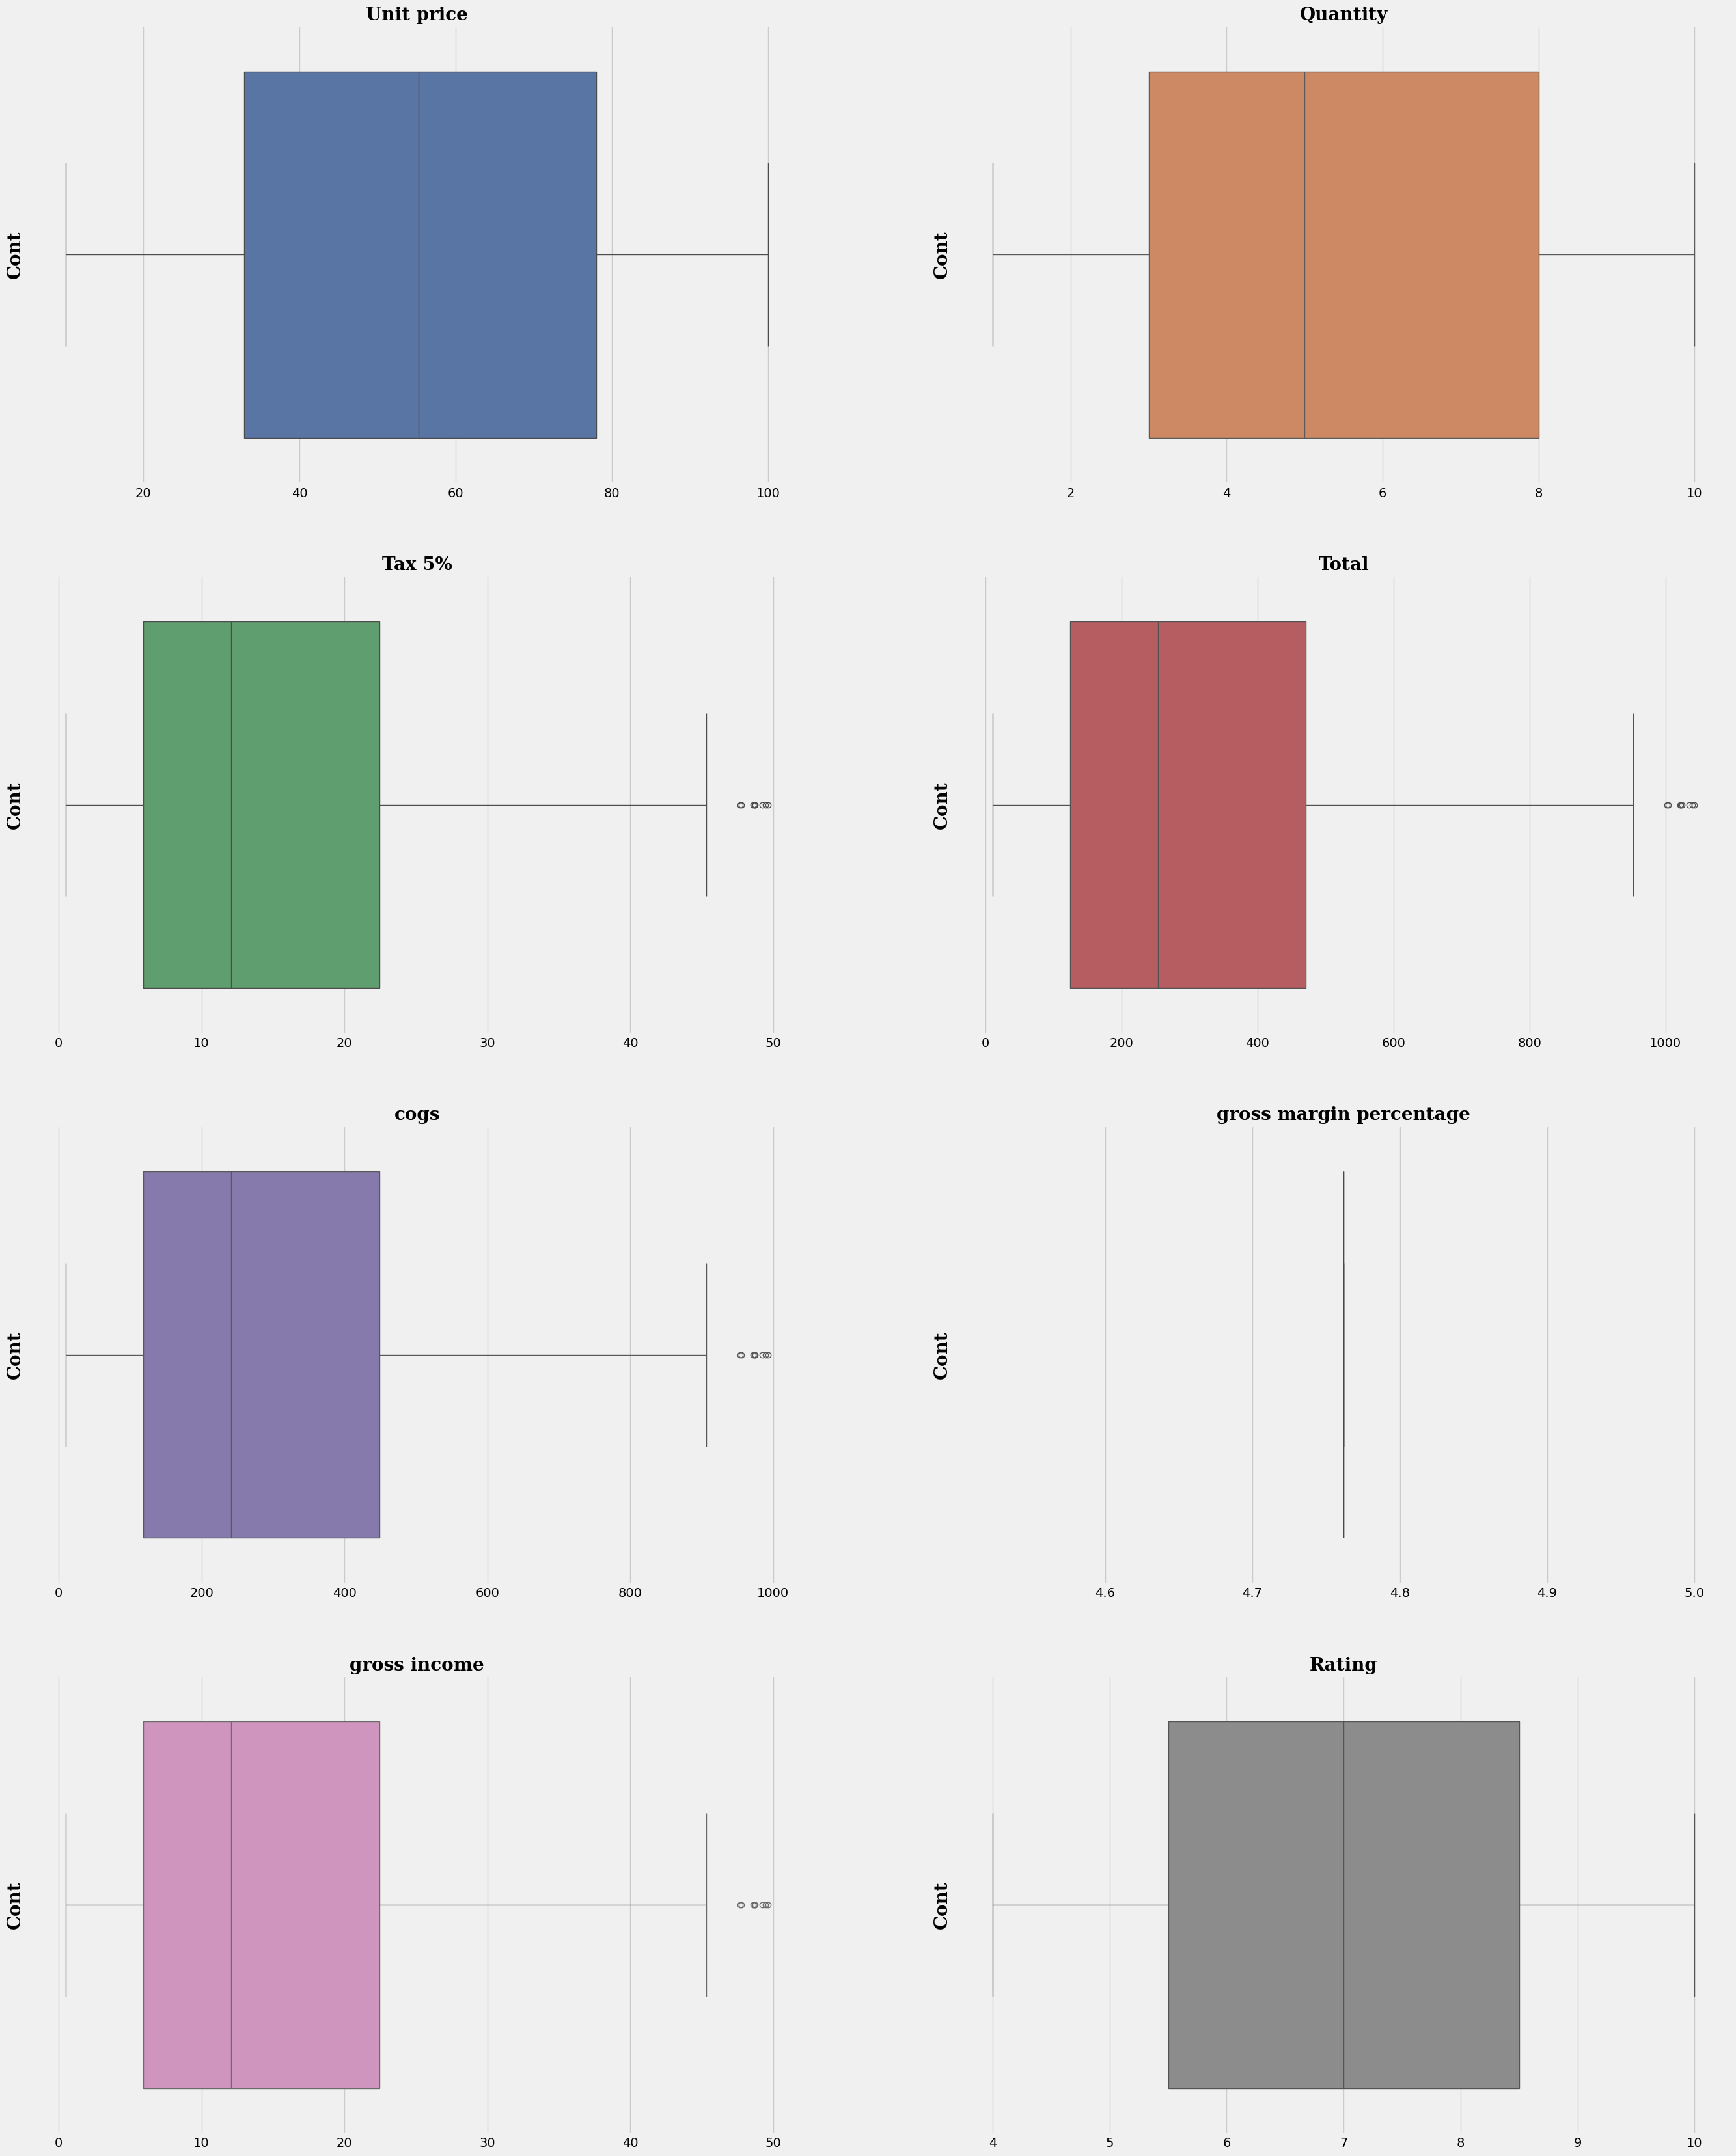

In [36]:
fig, ax=plt.subplots(4,2,figsize=(30,40))
ax=ax.flatten()
for i, col in enumerate(numerical):  # i = index, col = value prenst in numerical df
    # print(i,' ', col)
    sns.boxplot(x=col, data=df, ax=ax[i], color=palette[i])
    ax[i].set_title(col, fontweight = 'bold', fontfamily = 'serif', fontsize =20)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Cont', fontweight='bold', fontsize=20, fontfamily='serif')

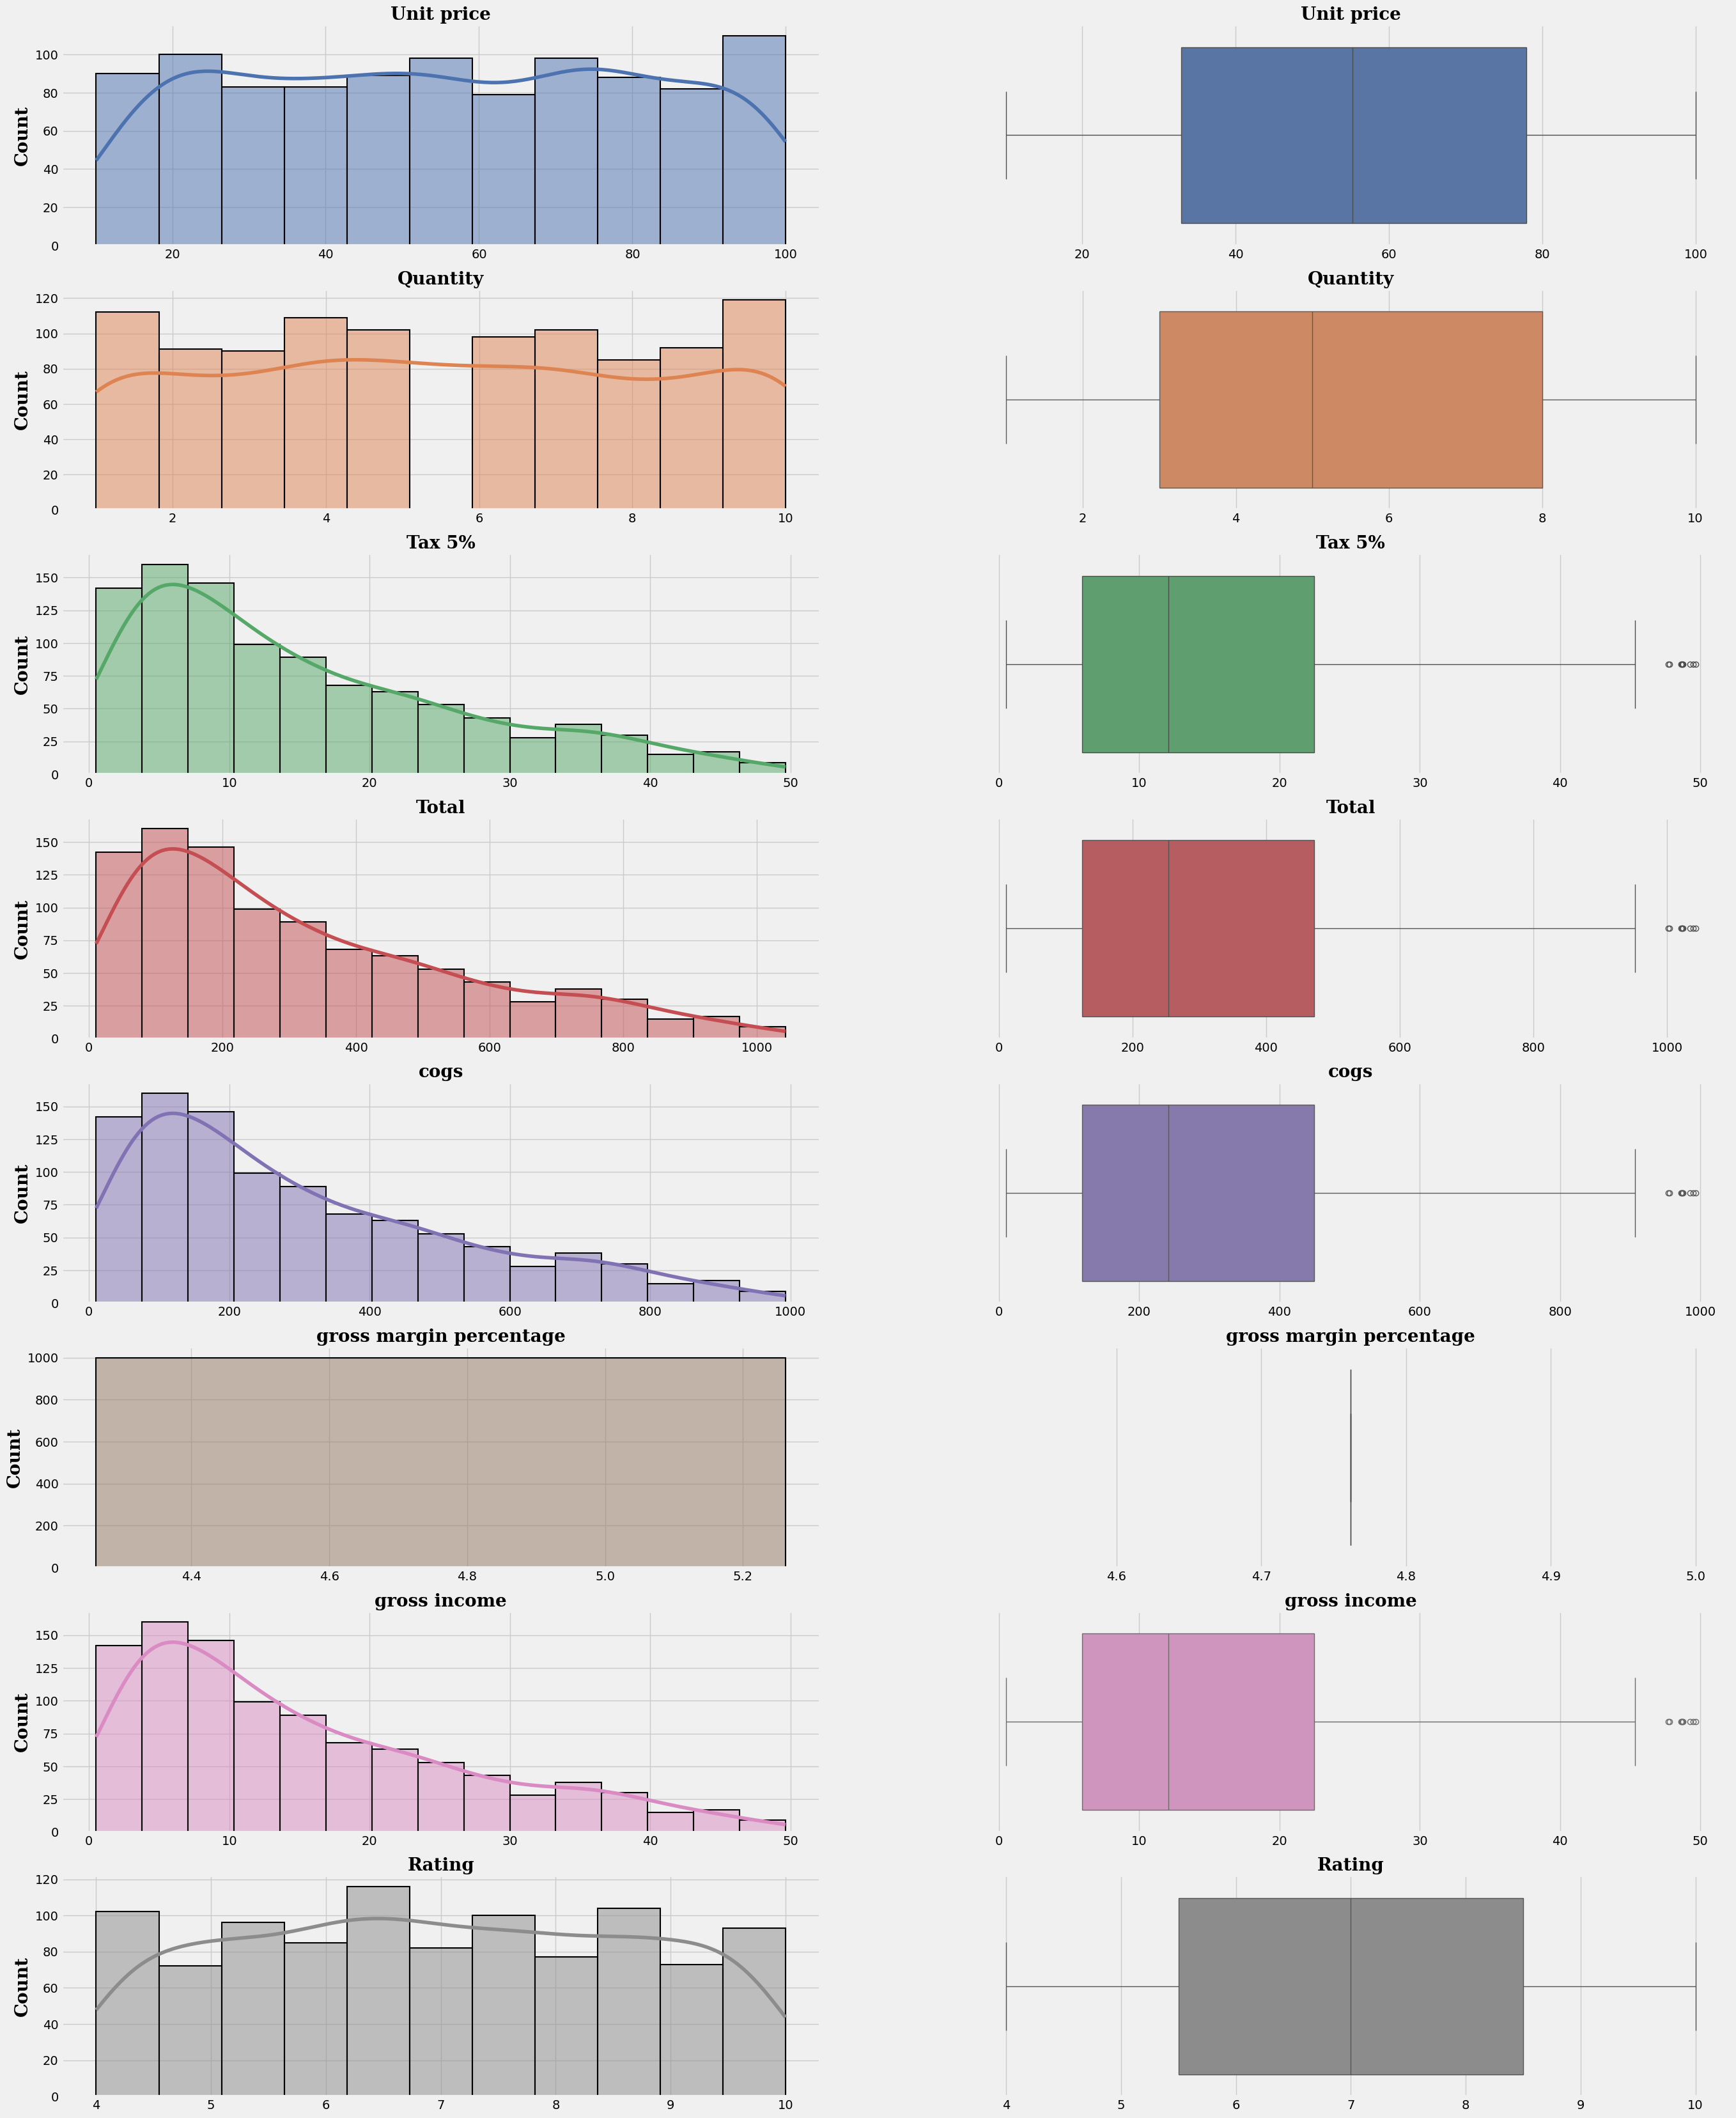

In [37]:
# merging both the plot to see the trend
fig, ax = plt.subplots(8,2, figsize =(30,40))
ax=ax.flatten()
for i, col in enumerate(numerical):
    sns.histplot(x=col, data=df, ax=ax[i*2], color=palette[i], kde=True, lw=1.5,edgecolor='black')
    ax[i*2].set_title(col, fontweight = 'bold', fontfamily='serif',fontsize=20)
    ax[i*2].set_xlabel('')
    ax[i*2].set_ylabel('Count', fontweight = 'bold', fontfamily='serif', fontsize=20)

    sns.boxplot(x=col, data=df, ax=ax[i*2+1], color=palette[i])
    ax[i*2+1].set_title(col, fontweight = 'bold', fontfamily = 'serif', fontsize =20)
    ax[i*2+1].set_xlabel('')
    ax[i*2+1].set_ylabel('')
plt.show()

In [38]:
df.head()

,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cogs,gross margin percentage,gross income,Rating,Day time
0,A || Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,Ewallet,522.83,4.761905,26.1415,9.1,Afternoon
1,C || Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,Cash,76.40,4.761905,3.8200,9.6,Morning
2,A || Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,Credit card,324.31,4.761905,16.2155,7.4,Afternoon
3,A || Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,Ewallet,465.76,4.761905,23.2880,8.4,Evening
4,A || Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,Ewallet,604.17,4.761905,30.2085,5.3,Morning


### Functions for customising the graph and adding legend to it

In [39]:
# funcion to edit graph and create legend
def setup_graph_legend(legend_title, x_label, y_label, graph_title):
    plt.legend(fontsize=15, title =legend_title, loc='upper right', shadow=True, title_fontproperties = {'weight':'bold', 'size':20,'family':'serif'})

    plt.xlabel(x_label, fontsize=20, fontweight ='bold', fontfamily='serif', labelpad=20)
    plt.ylabel(y_label, fontsize=20, fontweight ='bold', fontfamily='serif',labelpad=20)
    plt.title(graph_title, fontsize=20, fontweight='bold', fontfamily='serif')

    plt.xticks(fontsize=18, fontfamily='serif')
    plt.xticks(fontsize=15, fontfamily='serif')

def setup_graph(x_label, y_label, graph_title):
    plt.xlabel(x_label, fontsize=20, fontweight ='bold', fontfamily='serif', labelpad=20)
    plt.ylabel(y_label, fontsize=20, fontweight ='bold', fontfamily='serif',labelpad=20)
    plt.title(graph_title, fontsize=20, fontweight='bold', fontfamily='serif')

    plt.xticks(fontsize=18, fontfamily='serif')
    plt.xticks(fontsize=15, fontfamily='serif')

In [40]:
df['Day time'].value_counts().index

Index(['Afternoon', 'Evening', 'Morning', 'Noon'], dtype='object', name='Day time')

## 1. What is the most time that people buy in each city and branch

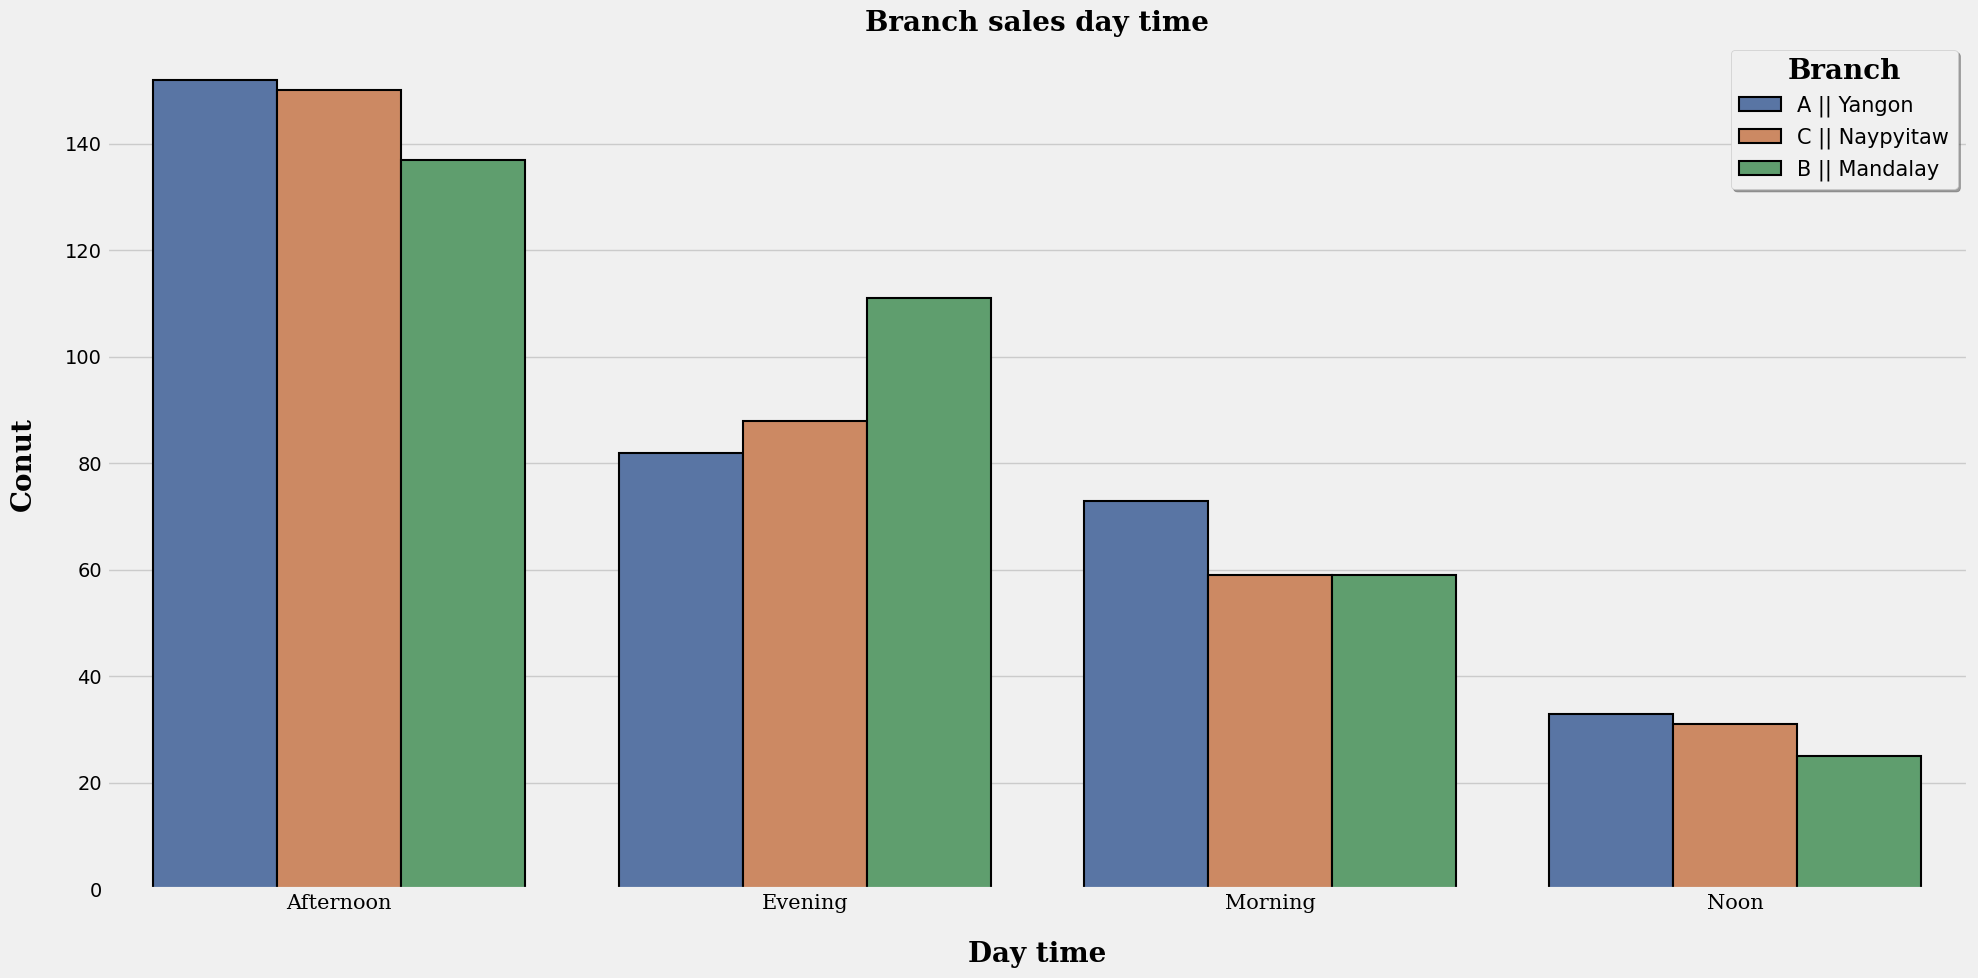

In [41]:
plt.figure(figsize=(20,10))
sns.countplot(x='Day time',data=df, palette=palette, edgecolor='black', linewidth=1.5, hue='Branch', order=df['Day time'].value_counts().index)
setup_graph_legend('Branch', 'Day time', 'Conut', 'Branch sales day time')
plt.tight_layout()
plt.show()


> **With almost equal sales in every branch, the afternoon had the largest sales. And the sales peaked around twelve. However, because the shorter time period fell under noon, the graph is actually quite short**

In [42]:
print(df.groupby('Branch')['Quantity'].mean().sort_values(ascending=False).index)

Index(['C || Naypyitaw', 'B || Mandalay', 'A || Yangon'], dtype='object', name='Branch')


In [43]:
x_coordinates=df.groupby('Branch')['Quantity'].mean().sort_values(ascending=False)
print(x_coordinates)

Branch
C || Naypyitaw    5.582317
B || Mandalay     5.481928
A || Yangon       5.467647
Name: Quantity, dtype: float64


In [44]:
x_coordinates=df.groupby('Branch')['Quantity'].mean().sort_values(ascending=False)[0]
print(x_coordinates)

5.5823170731707314


In [45]:
y_coordinates=round(df.groupby('Branch')['Quantity'].mean().sort_values(ascending=False))
print(y_coordinates)

Branch
C || Naypyitaw    6.0
B || Mandalay     5.0
A || Yangon       5.0
Name: Quantity, dtype: float64


In [46]:
y_coordinates=round(df.groupby('Branch')['Quantity'].mean().sort_values(ascending=False)[0])
print(y_coordinates)

6


## 2. Which branch is the most average quantity of selling?

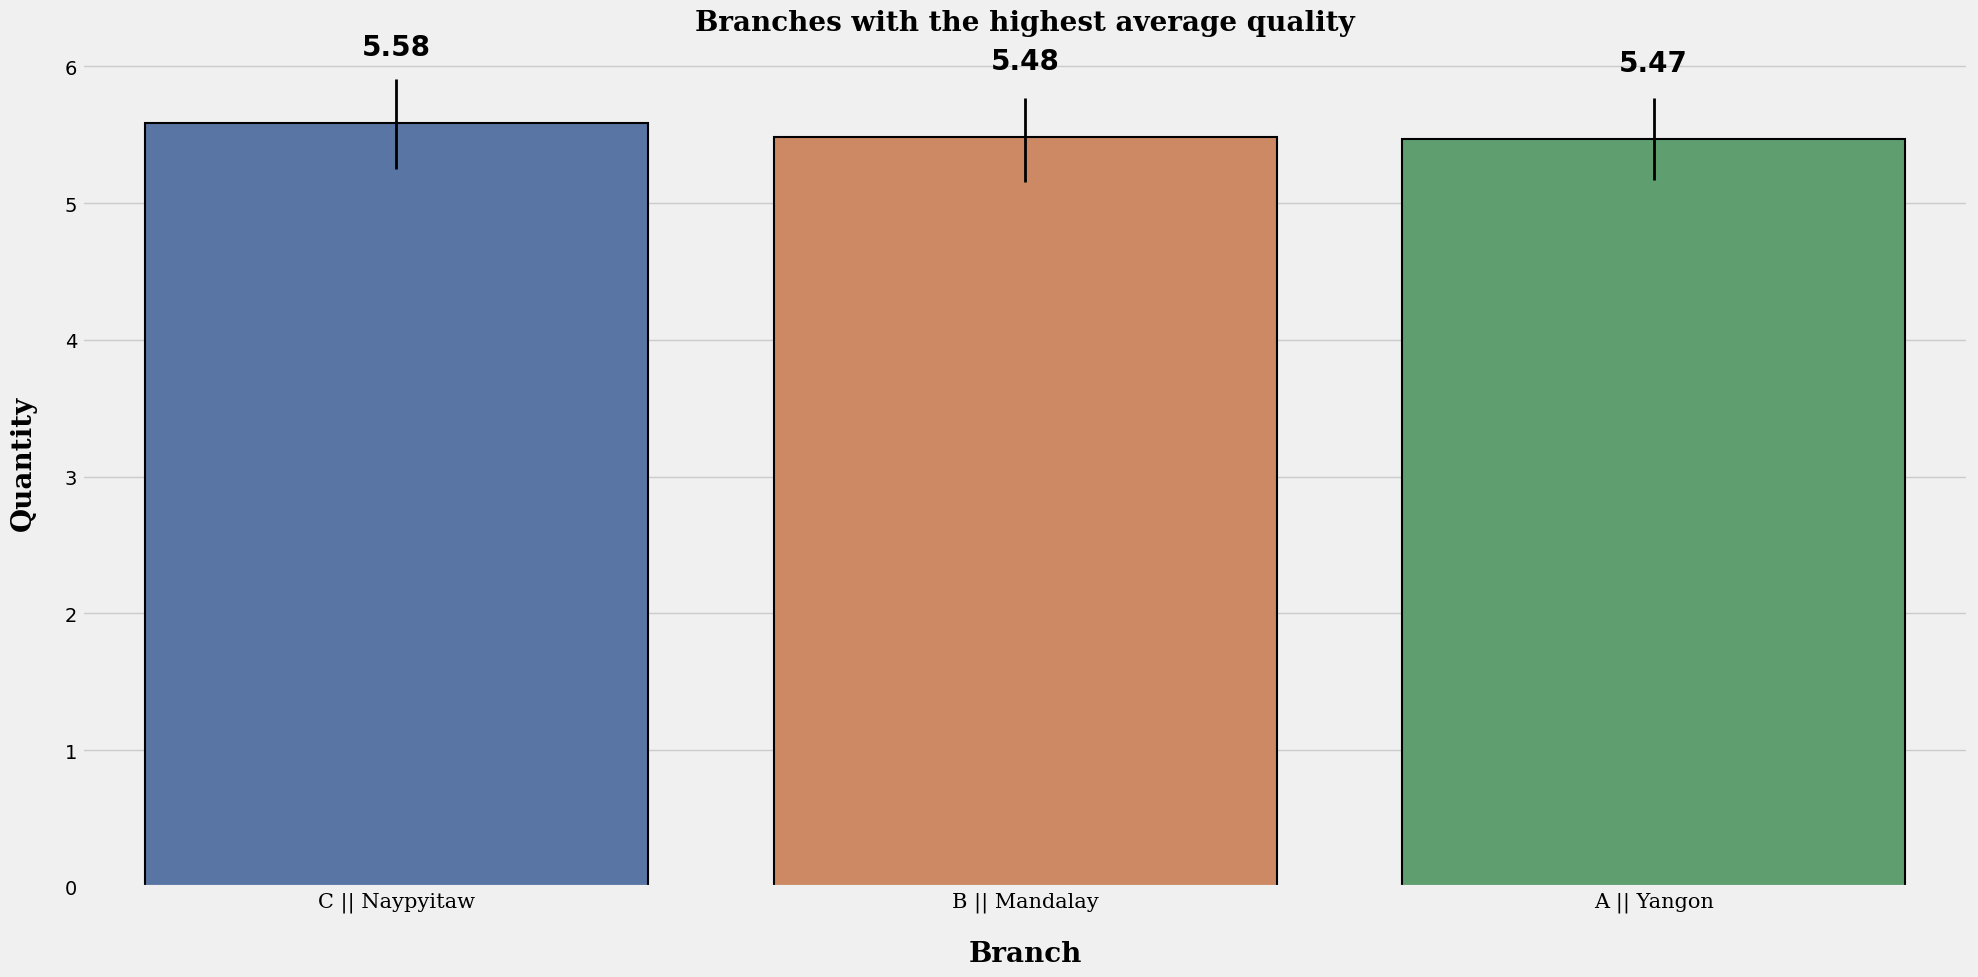

In [47]:
plt.figure(figsize=(20,10))
sns.barplot(x='Branch', y='Quantity', data=df, palette=palette,
            order =df.groupby('Branch')['Quantity'].mean().sort_values(ascending=False).index,
           edgecolor='black', errcolor='black', errwidth=2,lw=1.5)

actual_mean=df.groupby('Branch')['Quantity'].mean().sort_values(ascending=False)
round_off_text=round(df.groupby('Branch')['Quantity'].mean().sort_values(ascending=False),2)
# round(,2) function is used for generating a round-off and only 2 numbers after decimal
for i in range(3):
    plt.text(i,(actual_mean[i]+0.5), (round_off_text[i]), ha ='center', fontdict={'weight':'bold','size':20}, color='black')
                                # +0.5 is used here to add padding

setup_graph('Branch','Quantity', 'Branches with the highest average quality')
plt.tight_layout()
plt.show()

> **The average sales for each branch are nearly identical**

# 3. Which branch have the most average gross income?

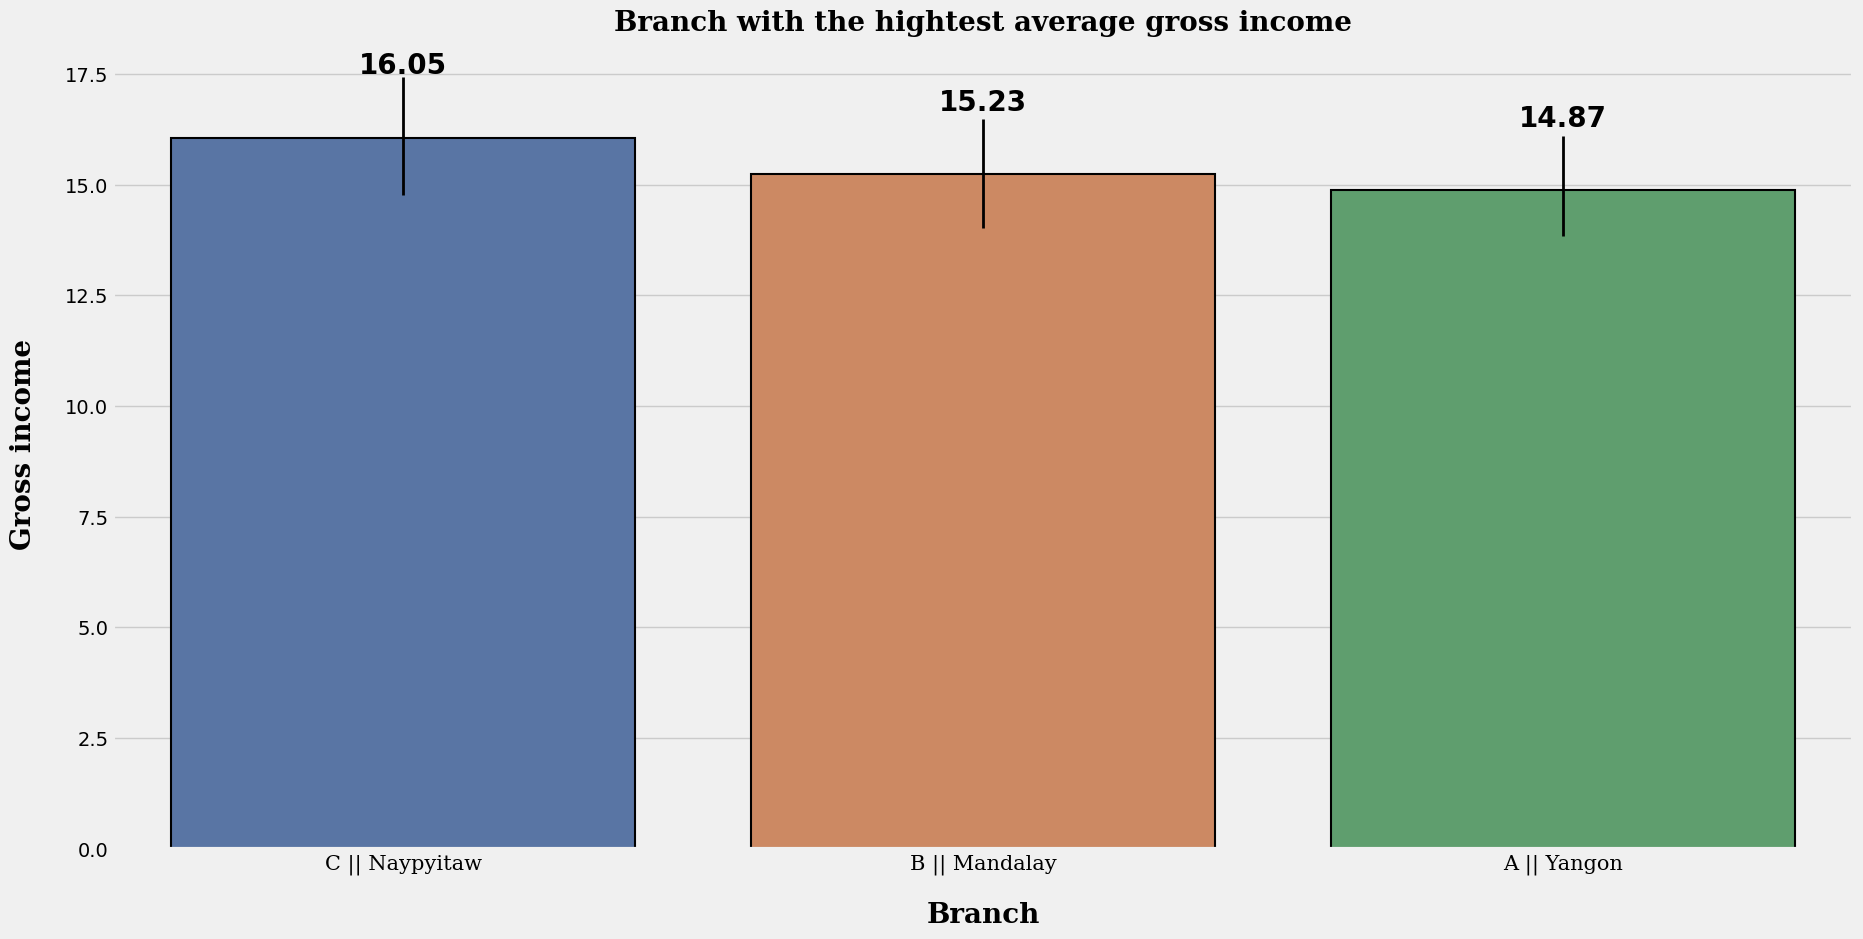

In [48]:
plt.figure(figsize=(20,10))
order = df.groupby('Branch')['gross income'].mean().sort_values(ascending = False).index
sns.barplot(x='Branch', y='gross income', data = df, palette=palette, order=order, edgecolor = 'black', errcolor='black', errwidth=2, lw=1.5)

actual_mean = df.groupby('Branch')['gross income'].mean().sort_values(ascending = False)
round_off_text = round(df.groupby('Branch')['gross income'].mean().sort_values(ascending=False),2)

for i in range(3):
    plt.text(i,actual_mean[i]+1.45,round_off_text[i], ha='center',fontdict={'weight':'bold','size':20},color='black')

setup_graph('Branch', 'Gross income','Branch with the hightest average gross income')

It make sense that the branch with the most average quantity of selling is the branch with the most average gross income

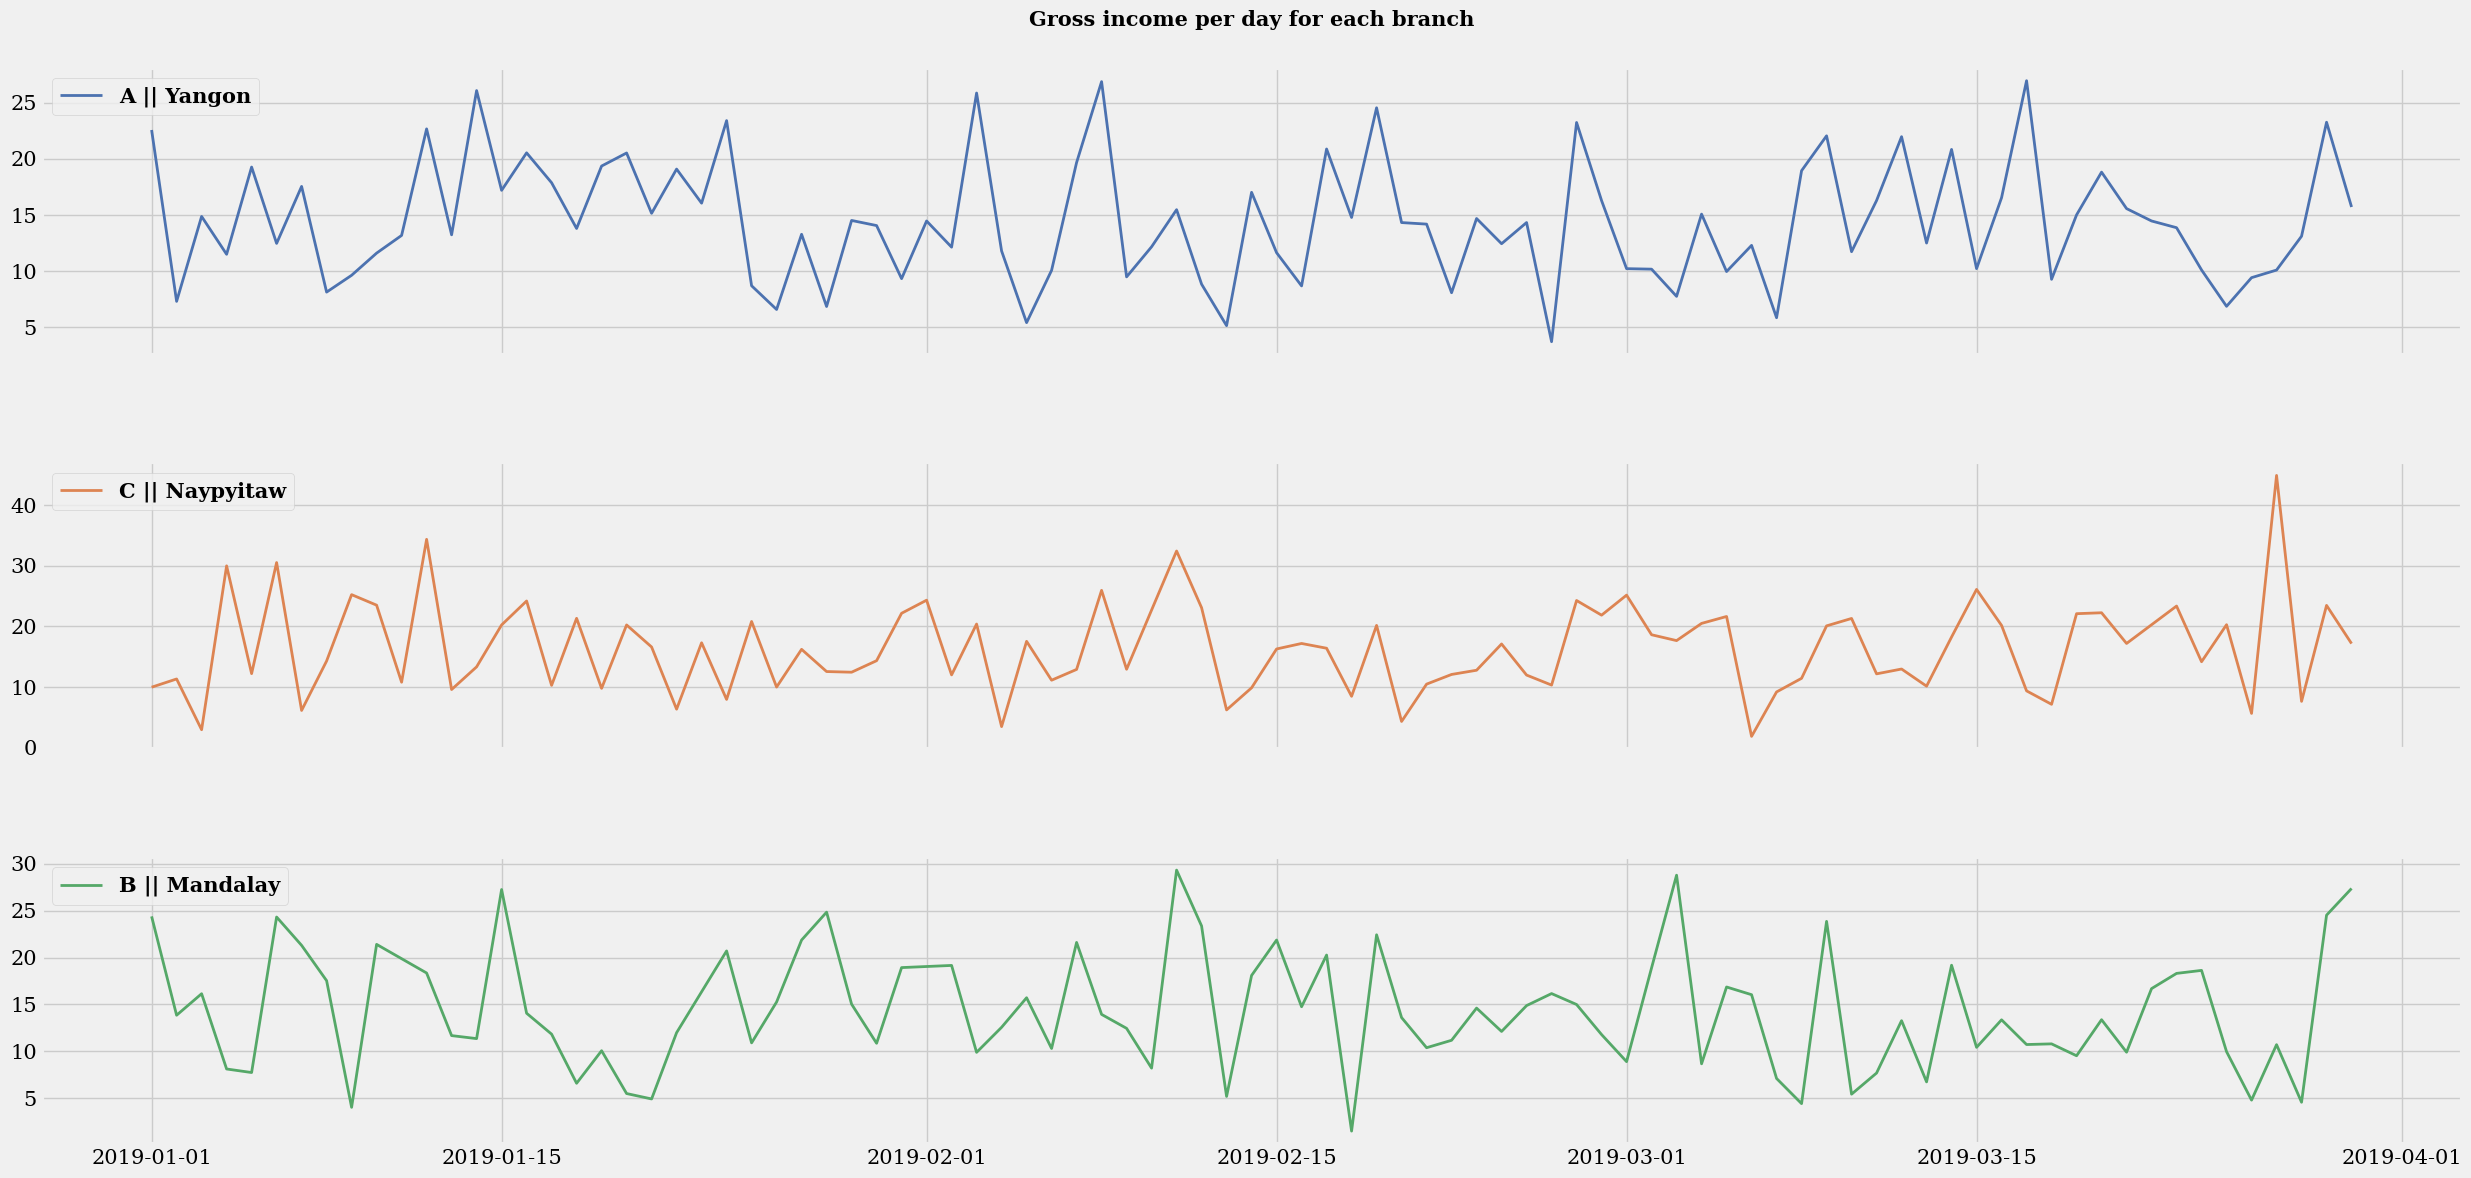

In [49]:
fig, ax=plt.subplots(nrows=3, ncols=1, figsize=(25,12),sharex=True)
for i, col in enumerate(df.Branch.unique()):
    sns.lineplot(x='Date',y='gross income',data=df[df.Branch==col], lw=2,color=palette[i],ax=ax[i],errorbar=None)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Date',fontsize=20,fontweight='bold',fontfamily='serif',labelpad=30)
    ax[i].set_ylabel('',labelpad=20)
    labels=ax[i].get_xticklabels()+ax[i].get_yticklabels()
    [label.set_fontname('serif') for label in labels]
    [label.set_fontsize(15) for label in labels]

    ax[i].legend([col], fontsize =15, loc='upper left', prop={'weight':'bold','size':15,'family':'serif'})

ax[0].set_title('Gross income per day for each branch', fontsize=15, fontweight='bold',fontfamily='serif',pad=30)

plt.tight_layout(h_pad=5)
plt.show()


# 4. What time do members prefer to buy at?

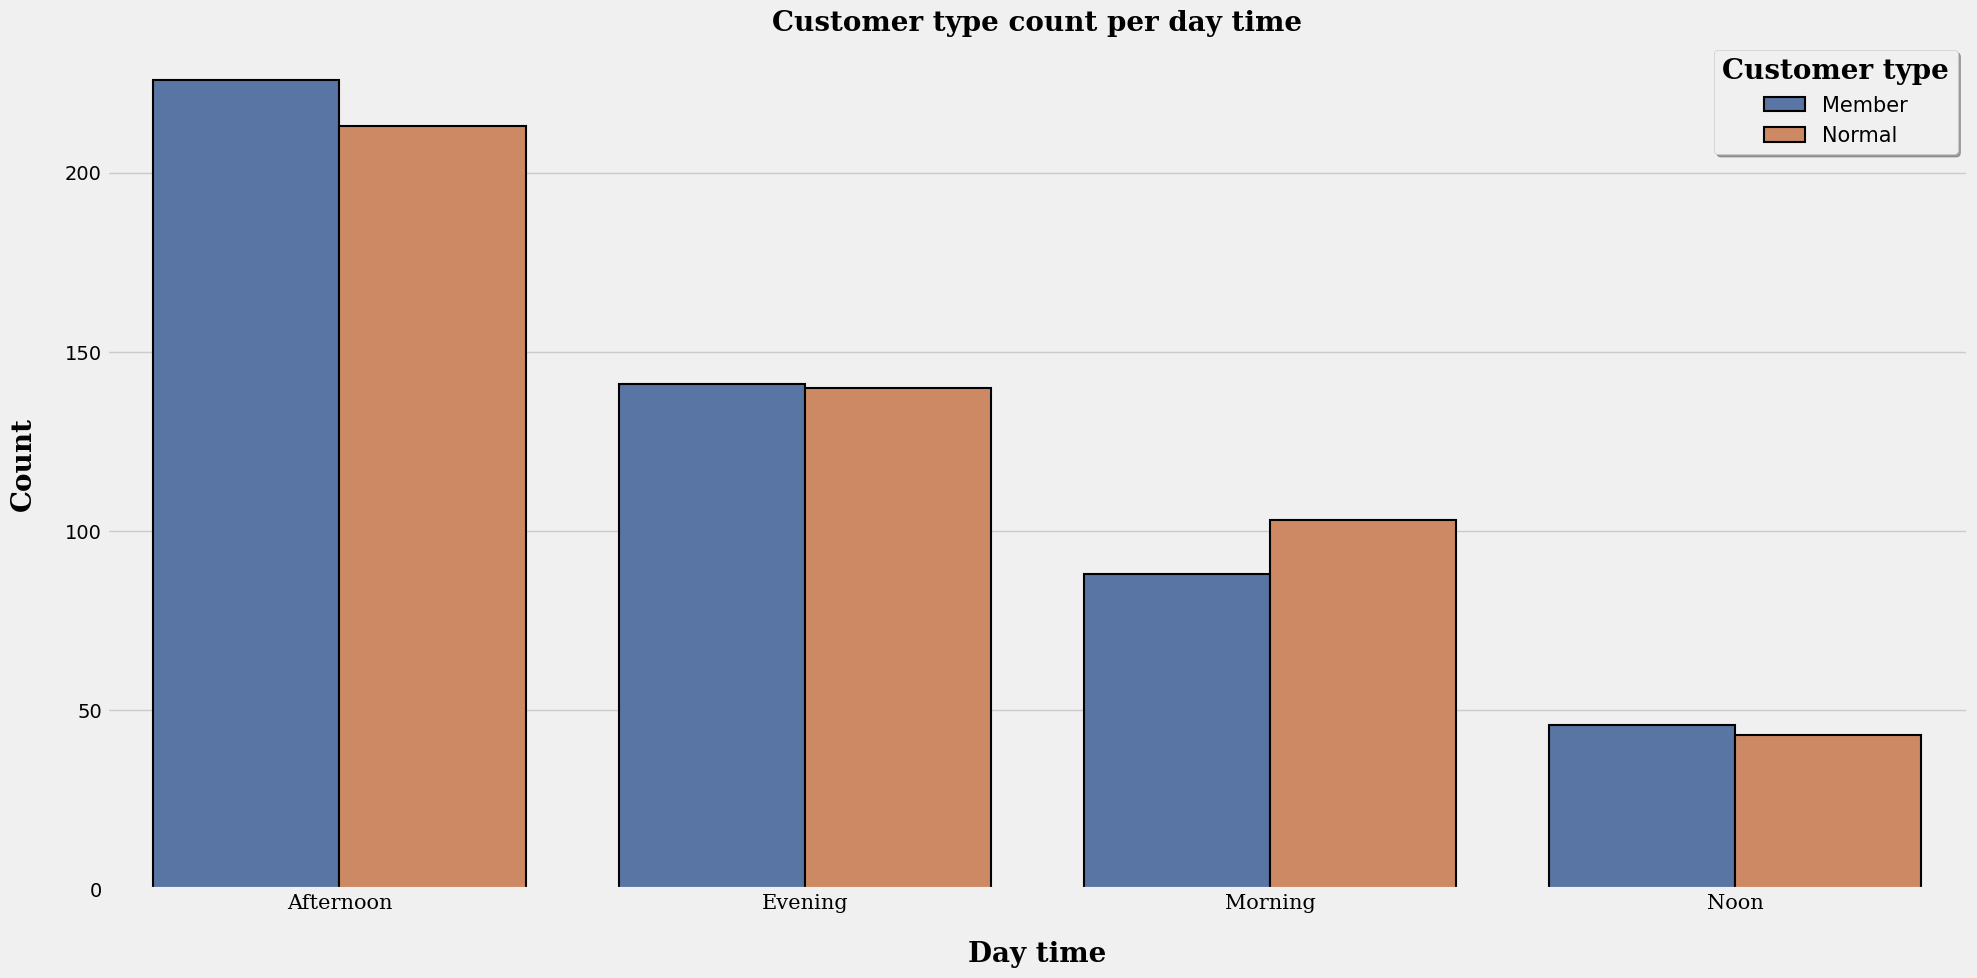

In [50]:
plt.figure(figsize=(20, 10))

sns.countplot(x='Day time', data=df, hue='Customer type', palette=palette,
                edgecolor='black', lw=1.5, order = df['Day time'].value_counts().index)

setup_graph_legend('Customer type', 'Day time', 'Count', 'Customer type count per day time')

plt.tight_layout()
plt.show()

We see that normal and members have the same distribution of buying time, but the majority of them all prefer to buy at afternoon.

# 5. What is the most successful product line in each branch?

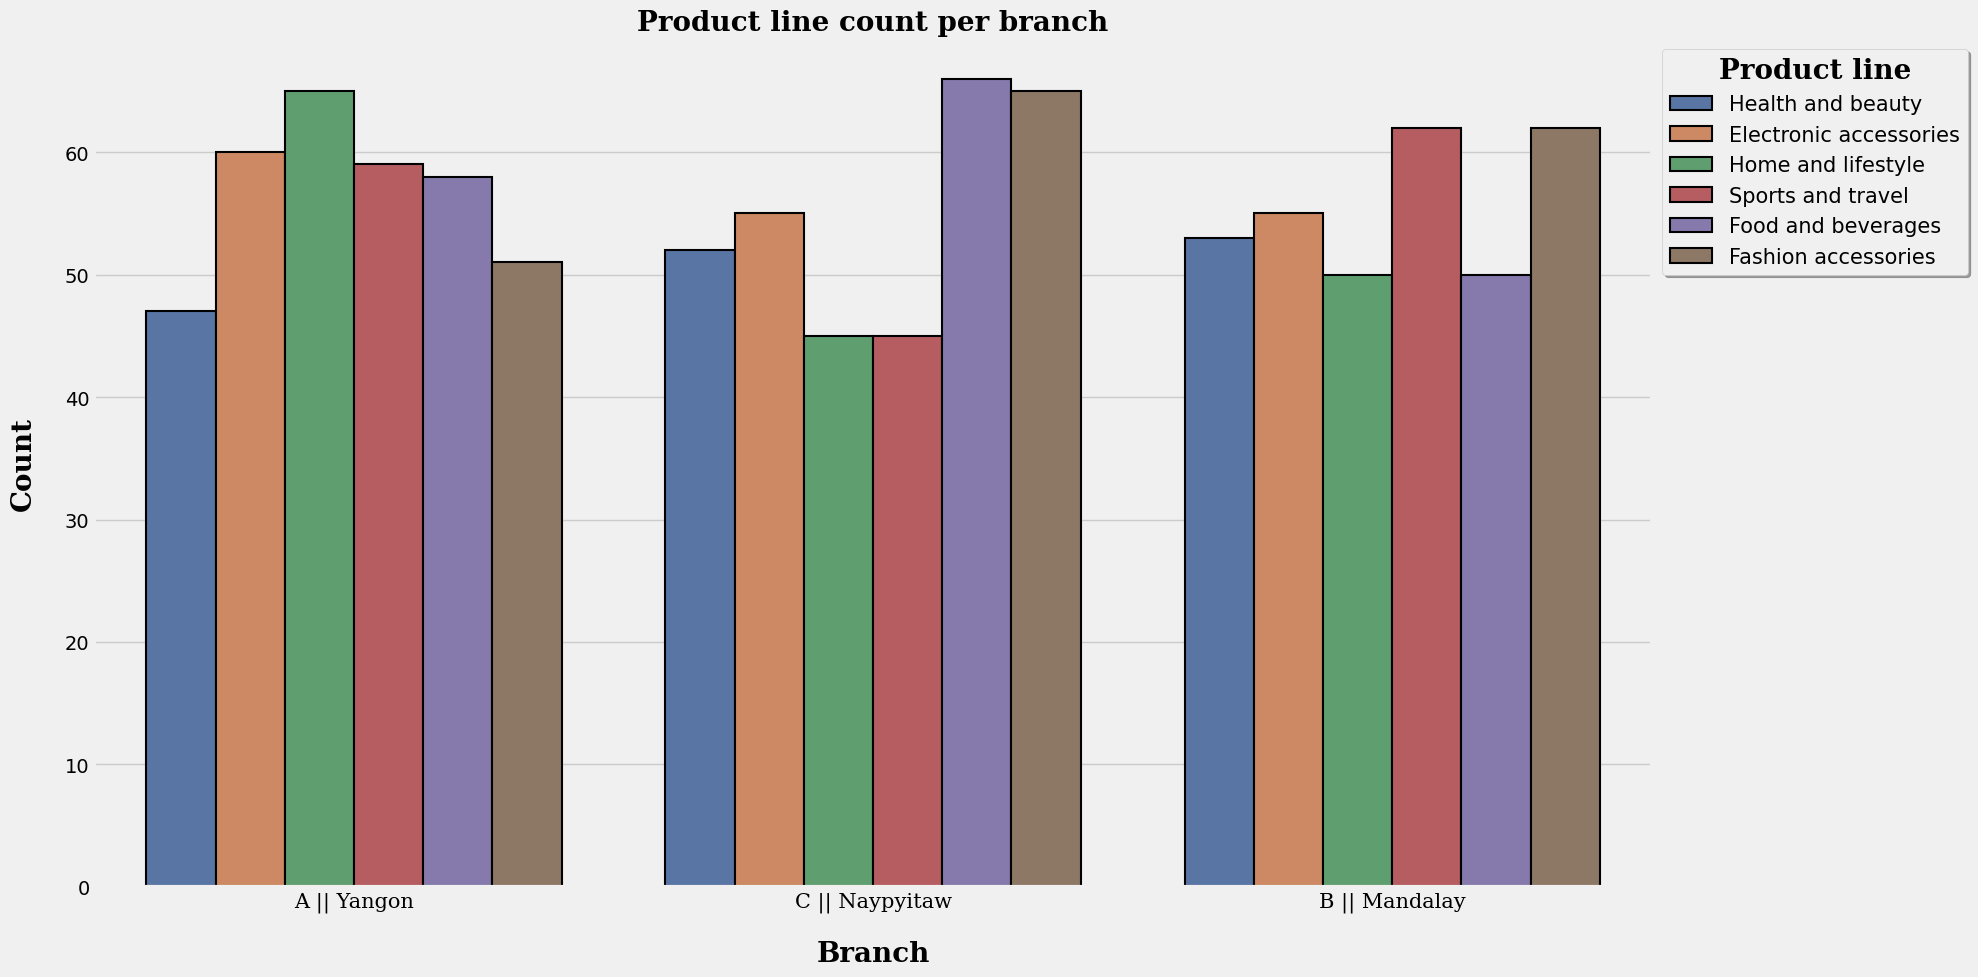

In [51]:
plt.figure(figsize=(20, 10))
sns.countplot(x = 'Branch', data = df, palette = palette,
              hue='Product line', lw=1.5, edgecolor='black')

setup_graph('Branch', 'Count', 'Product line count per branch')

plt.legend(fontsize = 15, title = 'Product line', bbox_to_anchor=(1, 1), loc='upper left',
            shadow = True, frameon = True, title_fontproperties={'weight':'bold', 'size':'20', 'family':'serif'})

plt.tight_layout()
plt.show()

## I noticed the following:

1. "Home and life style" is the most successful product line in branch A.

2. Both "Food and beverages" and "Fashion accessories" are the most successful product lines in branch B.

2. Both "Sports and travel" and "Fashion accessories" are the most successful product lines in branch C.

# 6. What is the most preferable payment method with each type of customers?

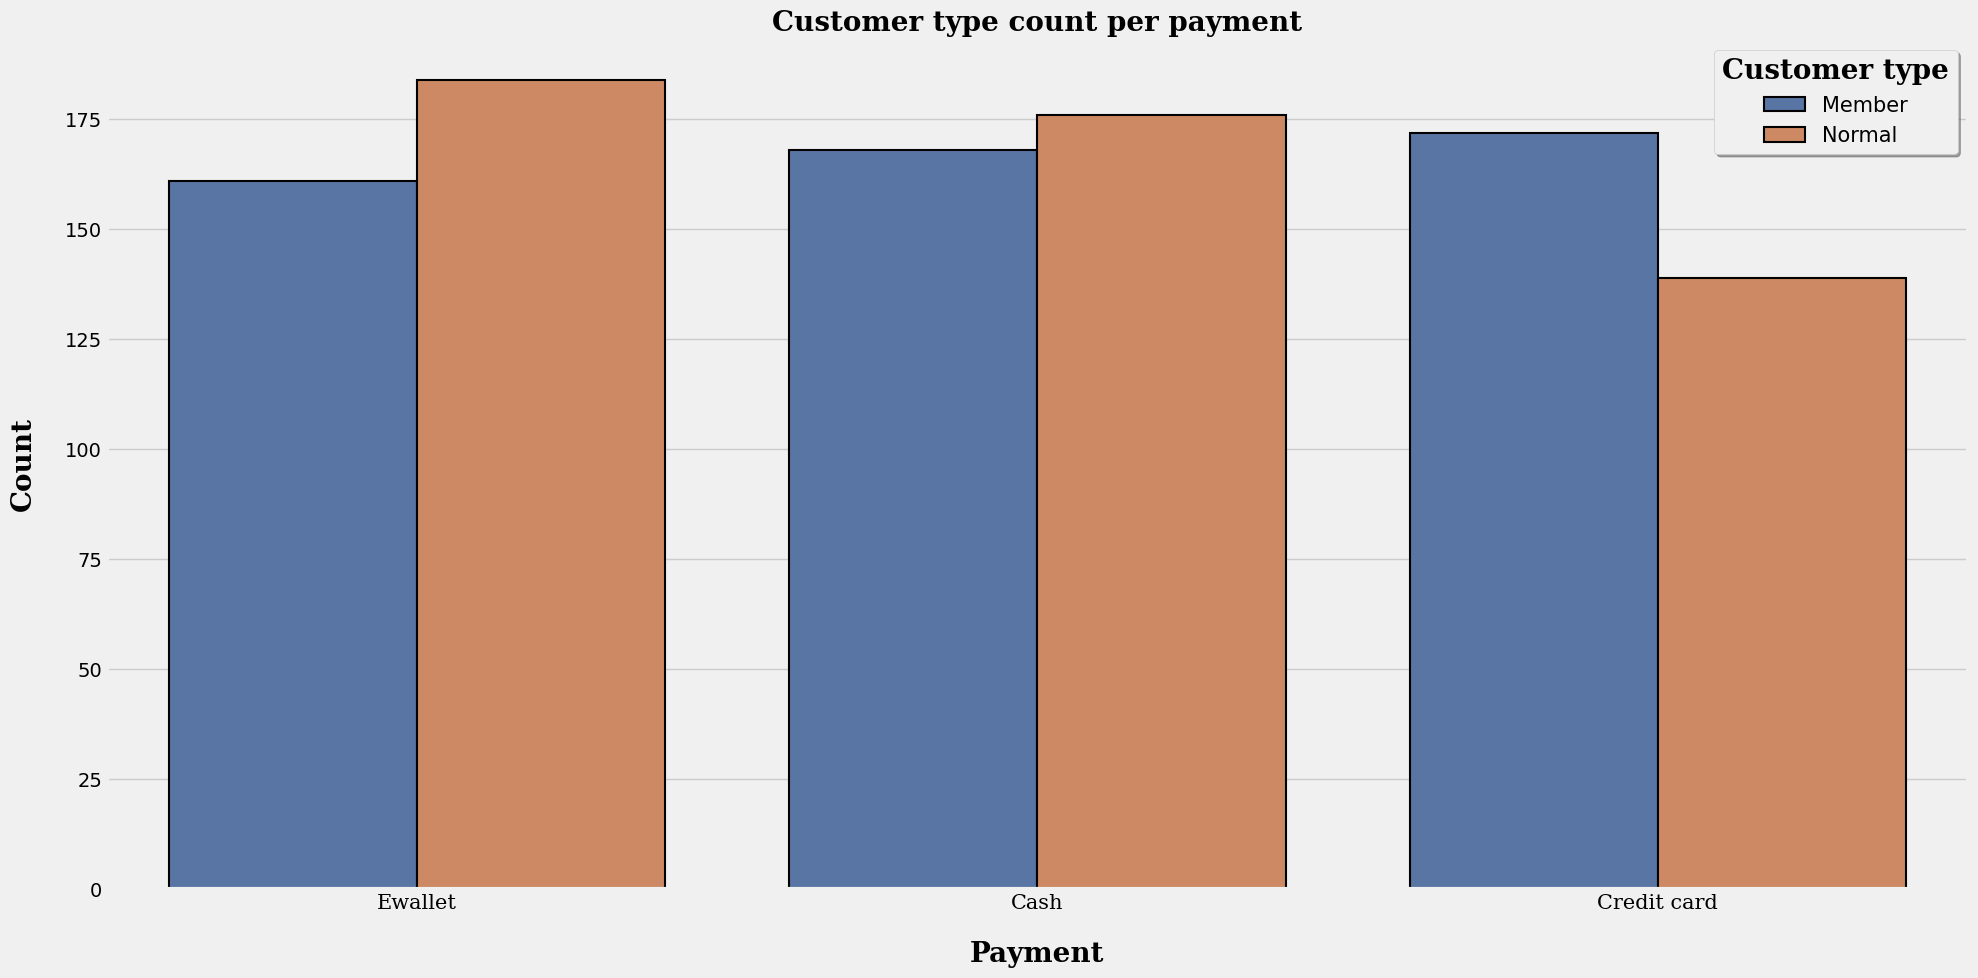

In [52]:
plt.figure(figsize=(20, 10))
sns.countplot(x = 'Payment', data = df, palette = palette,
              hue='Customer type', lw=1.5, edgecolor='black')

setup_graph_legend('Customer type', 'Payment', 'Count', 'Customer type count per payment')

plt.tight_layout()
plt.show()

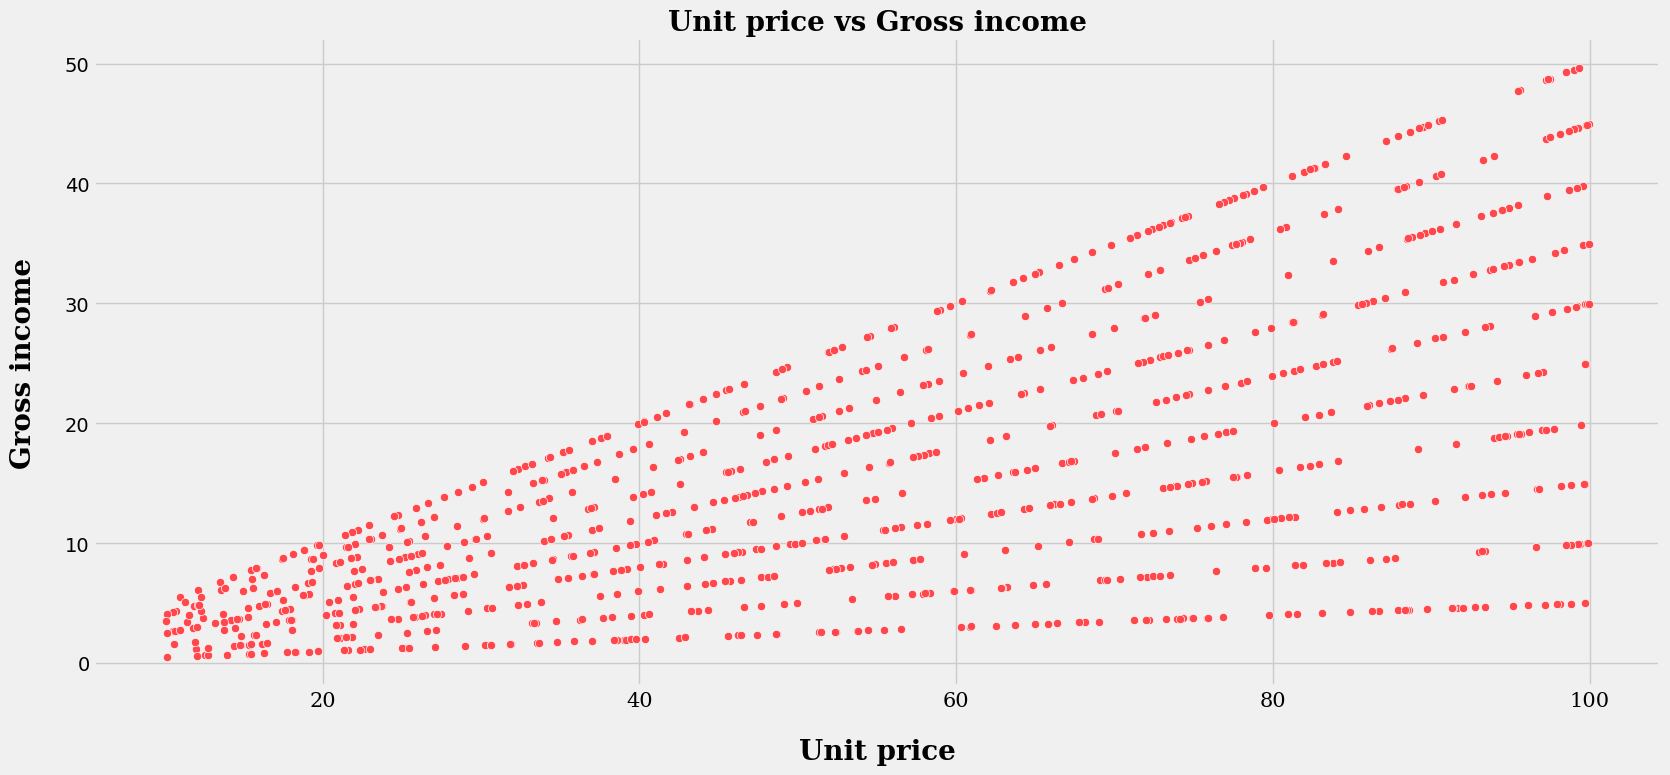

In [53]:
plt.figure(figsize=(18, 8))

sns.scatterplot(x = 'Unit price', y = 'gross income', data = df, color = 'xkcd:light red')

setup_graph('Unit price', 'Gross income', 'Unit price vs Gross income')

It's clear that every increasing in the unit price will lead to increasing in the gross income.